<a href="https://colab.research.google.com/github/KanyantaM/final-year-project/blob/main/Final_Year_Project_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DATA COLLECTION
In order to carry out the study a detailed load profile of the Electric Vehicle charging stations would introduce plus the already existing transformer loads. Because EV addoption is reletively new, actual charging data was not able to be collected. However, the driving and parking partterns of car owners can be studied and used to estimate/approximate the chharging behaviours of EV car owners.
For the already existing load, the load profiles of several hostels at the university of Zambia were closely studied a sample of the data collected in is shown below:

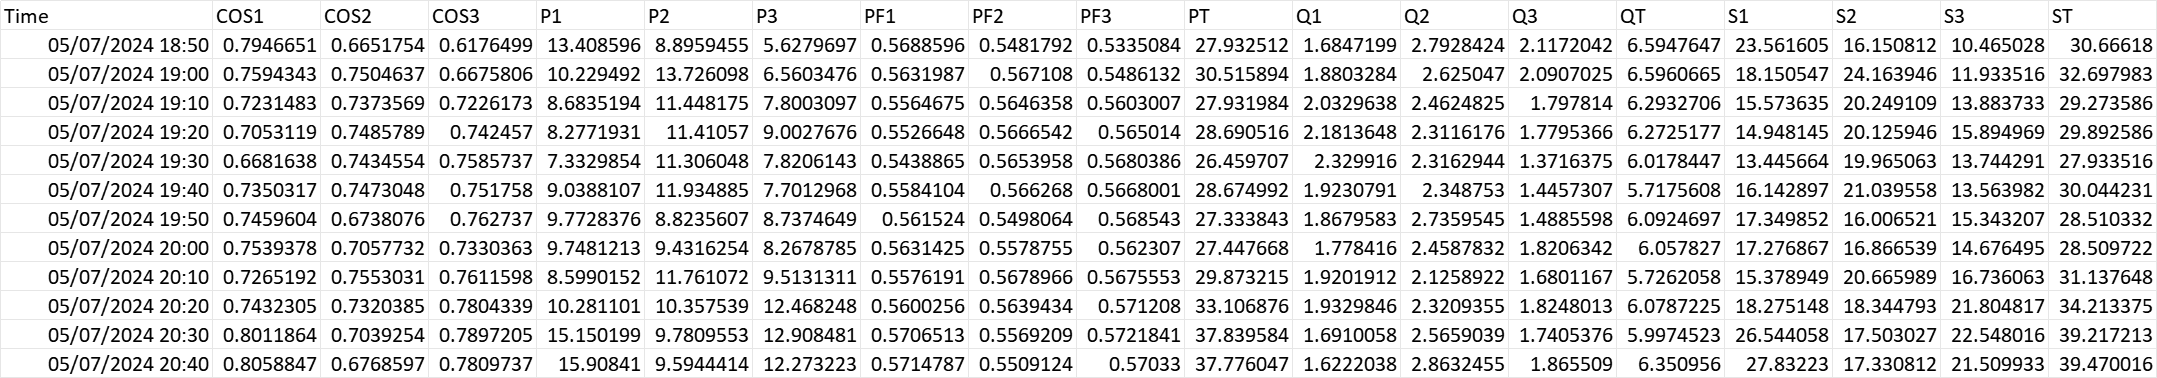

Similaryly total harmonic distortion data (THD) was collected as is shown in the image below:
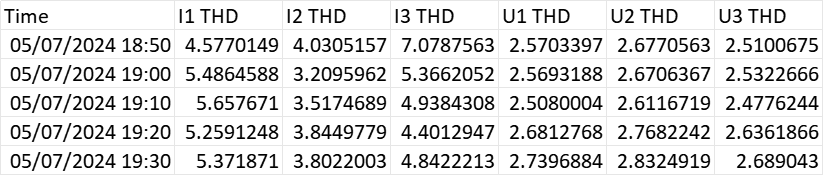

From here the data is then anlaysed to get the Load profile.

In [1]:
#Getting the packages needed for the data processing
import pandas as pd
#package for data analysis
import matplotlib.pyplot as plt
#importing tools to perform maths
import numpy as np

In [2]:
# Function to load CSV and prepare it for minute-by-minute analysis
def load_and_prepare_data(file_path, time_column='Time'):
    df = pd.read_csv(file_path, low_memory=False)

    # Convert the 'Time' column to datetime objects, with error handling
    df[time_column] = pd.to_datetime(df[time_column], format='%m/%d/%Y %H:%M', errors='coerce')

    # Drop rows where 'Time' could not be parsed
    df = df.dropna(subset=[time_column])

    # Extract the time part and convert to minutes since midnight (0 to 1440 minutes)
    df['Minutes'] = df[time_column].dt.hour * 60 + df[time_column].dt.minute

    # Set the 'Minutes' as the index
    df = df.set_index('Minutes')

    # Group by the minute intervals and calculate the mean for each minute
    minute_data = df.groupby('Minutes').mean()

    # Reindex to ensure every minute from 0 to 1440 is included
    full_index = pd.RangeIndex(start=0, stop=1441, step=1)  # 0 to 1440 minutes
    minute_data = minute_data.reindex(full_index)

    # Fill missing values using interpolation to smooth the lines (optional)
    minute_data = minute_data.interpolate(method='linear')  # You can also use .ffill(), .bfill() as alternatives

    return minute_data

In [3]:
# Function to load CSV and prepare it for hourly analysis and perform a moving average
def moving_average(file_path, time_column='Time'):
    df = pd.read_csv(file_path, low_memory=False)

    # Convert the 'Time' column to datetime objects, with error handling
    df[time_column] = pd.to_datetime(df[time_column], format='%m/%d/%Y %H:%M', errors='coerce')

    # Drop rows where 'Time' could not be parsed
    df = df.dropna(subset=[time_column])

    # Extract hour from the 'Time' column
    df['Hour'] = df[time_column].dt.hour

    # Set the 'Hour' as the index
    df = df.set_index('Hour')

    # Group by hour and calculate the mean for each hour
    hourly_data = df.groupby('Hour').mean()

    return hourly_data

# Z-Score Normalization function
def z_score_normalize(df):
    return (df - df.mean()) / df.std()

# Reverse Z-Score Normalization function (denormalization)
def reverse_z_score_normalize(df_normalized, original_df):
    return (df_normalized * original_df.std()) + original_df.mean()

## Hostel Load Profile

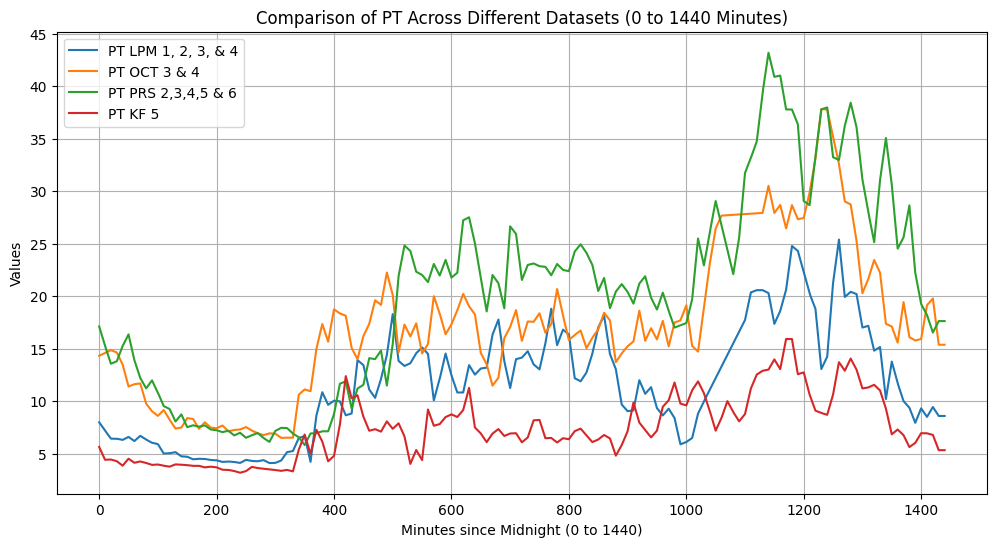

In [4]:
# Load and prepare the datasets
df1 = load_and_prepare_data("/content/drive/MyDrive/EV Final project/Mwansa's data/Mwanawasa Power & power factor.csv")
df2 = load_and_prepare_data("/content/drive/MyDrive/EV Final project/Mwansa's data/October-3&4  Power & power factor.csv")
df3 = load_and_prepare_data("/content/drive/MyDrive/EV Final project/Mwansa's data/President 2-6 Power & power factor (1).csv")
df4 = load_and_prepare_data("/content/drive/MyDrive/EV Final project/Mwansa's data/Kaufe Block 5 Power Pf & Cos (2).csv")

# Merge the datasets based on the 'Minutes' index
merged_df_raw = pd.concat([df1, df2, df3, df4], axis=1, keys=['File1', 'File2', 'File3', 'File4'])

# Plot the comparison for a selected variable, e.g., 'PT'
plt.figure(figsize=(12, 6))

plt.plot(merged_df_raw['File1', 'PT'], label='PT LPM 1, 2, 3, & 4')
plt.plot(merged_df_raw['File2', 'PT'], label='PT OCT 3 & 4')
plt.plot(merged_df_raw['File3', 'PT'], label='PT PRS 2,3,4,5 & 6')
plt.plot(merged_df_raw['File4', 'PT'], label='PT KF 5')

plt.title('Comparison of PT Across Different Datasets (0 to 1440 Minutes)')
plt.xlabel('Minutes since Midnight (0 to 1440)')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

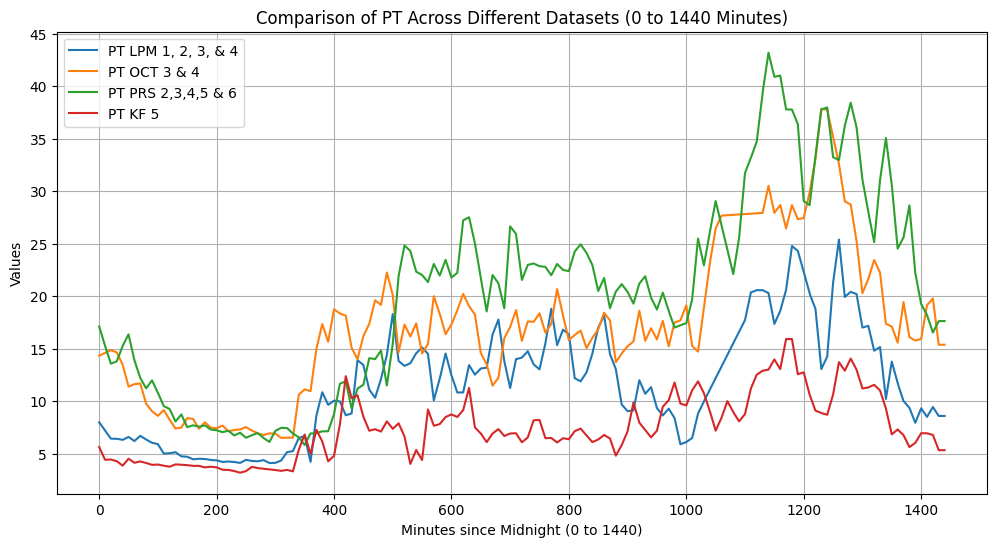
From the data it can be seen that the graph is very spikey and not smooth as is needed for more generalized data analysis and to get a more accurate load profile model, we had the a moving avarage on an hourly basis smooth out the  data.

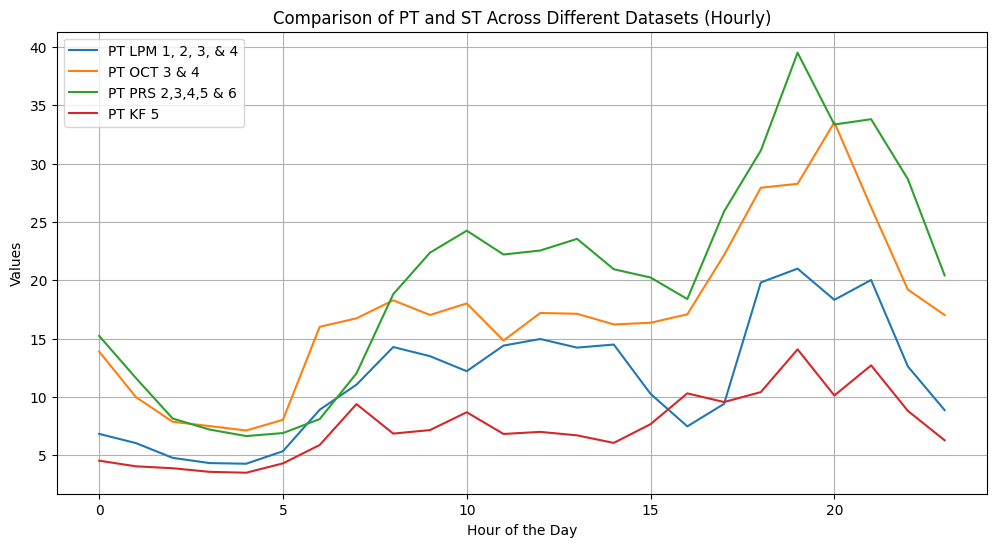

In [5]:
#performing moving average on the data
df1_av = moving_average("/content/drive/MyDrive/EV Final project/Mwansa's data/Mwanawasa Power & power factor.csv")
df2_av = moving_average("/content/drive/MyDrive/EV Final project/Mwansa's data/October-3&4  Power & power factor.csv")
df3_av = moving_average("/content/drive/MyDrive/EV Final project/Mwansa's data/President 2-6 Power & power factor (1).csv")
df4_av = moving_average("/content/drive/MyDrive/EV Final project/Mwansa's data/Kaufe Block 5 Power Pf & Cos (2).csv")


# Merge the datasets based on the 'Hour' index
merged_df = pd.concat([df1_av, df2_av, df3_av, df4_av], axis=1, keys=['File1', 'File2', 'File3', 'File4'])

# Plot the comparison for a selected variable, e.g., 'PT' and 'ST'
plt.figure(figsize=(12, 6))

plt.plot(merged_df['File1', 'PT'], label='PT LPM 1, 2, 3, & 4')
plt.plot(merged_df['File2', 'PT'], label='PT OCT 3 & 4')
plt.plot(merged_df['File3', 'PT'], label='PT PRS 2,3,4,5 & 6')
plt.plot(merged_df['File4', 'PT'], label='PT KF 5')

plt.title('Comparison of PT and ST Across Different Datasets (Hourly)')
plt.xlabel('Hour of the Day')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()


The data collected is shown below which is much smoother than the initial data that was collected. This can be seen from below:
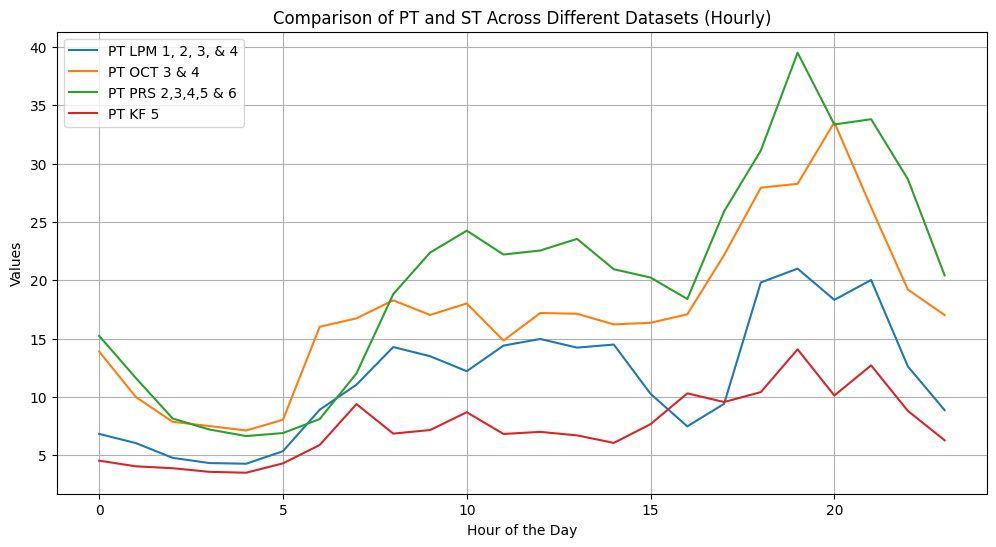

From here the standard - score normalization was then carried out to scale the all the graphs and get the normalized model which is then used to estmate the standard daily load profile of an UNZA hostel.

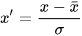

      hours         PT
Hour                  
19       19  21.650876
20       20  19.356648
21       21  19.627020
22       22  13.984381
23       23  10.369590
      minutes        PT
1435     1435  10.36959
1436     1436  10.36959
1437     1437  10.36959
1438     1438  10.36959
1439     1439  10.36959


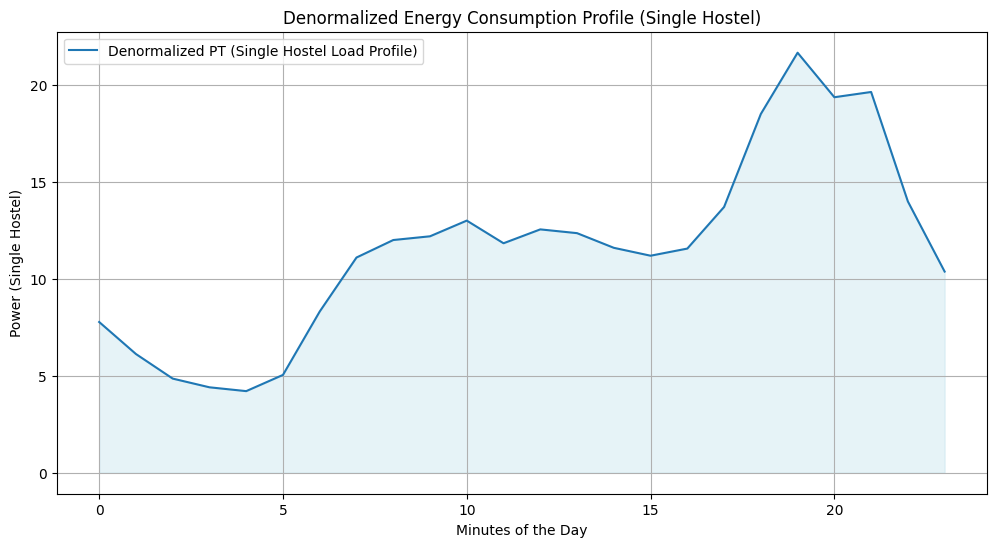

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Normalize the data for each file based on the number of hostels (apply only to numeric columns)
df1_normalized_av = z_score_normalize(df1_av.select_dtypes(include=['float64', 'int64']).apply(lambda x: x / 4))  # File1 has 4 hostels
df2_normalized_av = z_score_normalize(df2_av.select_dtypes(include=['float64', 'int64']).apply(lambda x: x / 2))  # File2 has 2 hostels
df3_normalized_av = z_score_normalize(df3_av.select_dtypes(include=['float64', 'int64']).apply(lambda x: x / 4))  # File3 has 4 hostels
df4_normalized_av = z_score_normalize(df4_av.select_dtypes(include=['float64', 'int64']).apply(lambda x: x / 1))  # File4 has 1 hostel

# Merge the normalized datasets based on the 'Hour' index
merged_df_normalized_av = pd.concat([df1_normalized_av, df2_normalized_av, df3_normalized_av, df4_normalized_av], axis=1, keys=['File1', 'File2', 'File3', 'File4'])

# Calculate the average PT across all normalized hostels
merged_df_normalized_av['Average_PT'] = (merged_df_normalized_av['File1', 'PT'] +
                                      merged_df_normalized_av['File2', 'PT'] +
                                      merged_df_normalized_av['File3', 'PT'] +
                                      merged_df_normalized_av['File4', 'PT']) / 4  # Taking the average of PT

# De-normalize the average to get back to the original scale
# Use df1['PT'] as the reference scale for denormalization
average_single_hostel_profile = reverse_z_score_normalize(merged_df_normalized_av['Average_PT'], df1_av['PT'])


# Create a DataFrame for the hourly data
average_load_profile_h_df_hourly = pd.DataFrame({
    'hours': range(24),
    'PT': average_single_hostel_profile,
})

print(average_load_profile_h_df_hourly.tail())

# Create a DataFrame for the 1440 minutes
minutes = range(1440)

# Create a DataFrame for the minute steps
average_load_profile_h_df = pd.DataFrame({
    'minutes': minutes
})

# Create a minute-level load profile from hourly data
# Repeat each hour's data 60 times to fill the minute-level DataFrame
average_load_profile_h_df['PT'] = average_load_profile_h_df_hourly['PT'].repeat(60).reset_index(drop=True)

# Interpolate missing values if needed
# Assuming there are no missing values in this case, but keep this line if needed in your logic
# average_load_profile_h_df['PT'] = average_load_profile_h_df['PT'].interpolate(method='linear')

# Print the final DataFrame (the last few rows as a check)
print(average_load_profile_h_df.tail())
# Plot the final result
plt.figure(figsize=(12, 6))

plt.plot(average_load_profile_h_df_hourly['hours'], average_load_profile_h_df_hourly['PT'], label='Denormalized PT (Single Hostel Load Profile)')
plt.fill_between(average_load_profile_h_df_hourly['hours'], average_load_profile_h_df_hourly['PT'], alpha=0.3, color='lightblue')

plt.title('Denormalized Energy Consumption Profile (Single Hostel)')
plt.xlabel('Minutes of the Day')
plt.ylabel('Power (Single Hostel)')
plt.legend()
plt.grid(True)
plt.show()


This gave a clear representative load profile model of a single hostel as is shown below:
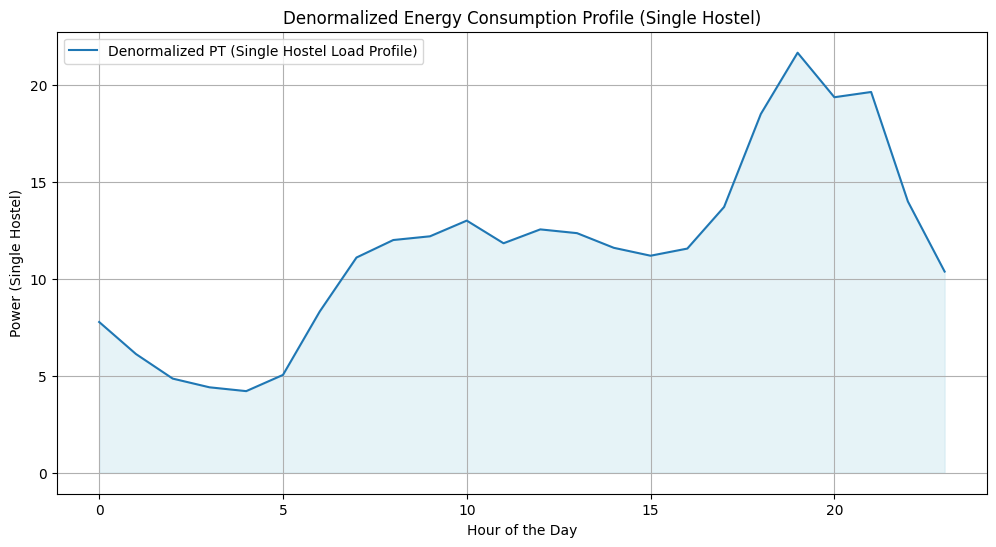


## EV load profile Simulation

Because of the low adoption of EV's in the country actual data on the charging partterns of EV car owners couldn't be obtained. Instead, what was done was time was spent to monitor the parking partterns of car owners on the University of Zambia Old Residents carpark. From here it was noted that most cars arrive in the mornings and a few of them leave around noon. return post nooon and all leave by the evenings. After consistent monitoring of the vehicle activity a small dataset was collected from which the mean time of vehichle arrival and leaving/ time away was then made using statistical methods. to find the mean times and standard deviations of these patterns.

And the following was found that the arrival time of the cars had a mean of 8.45 hours (08 27 hrs) with a standard deviation of 1 hour.

For the departure of some cars, it was estimated that about 40% of the cars leave the car park at slightly after noon with the statistacal data we had collected showing that the mean of the time the cars are leaving was at 14.5 hours or 14 30 hrs, with a standard deviataion of 0.56 hours or 33.54 minutes.

From these times the time an electric vehicle is connected to charge can be estimated. And to increase the realistic nature of the approximation a monte carlo simulation was run with a 10000 test points within the normal distribution of the estimated times the drivers arrive at the carparks in the mornings and afternoons

To find out charging times, it is known from surveys taken in the country that the most widley adopted EV charger in low voltage residential distribution networks is the level 2 charger that has a power output of 7kW.
Also the power rating of the car chosen was the nissan leaf as it is currently the most adopted electric vehicle

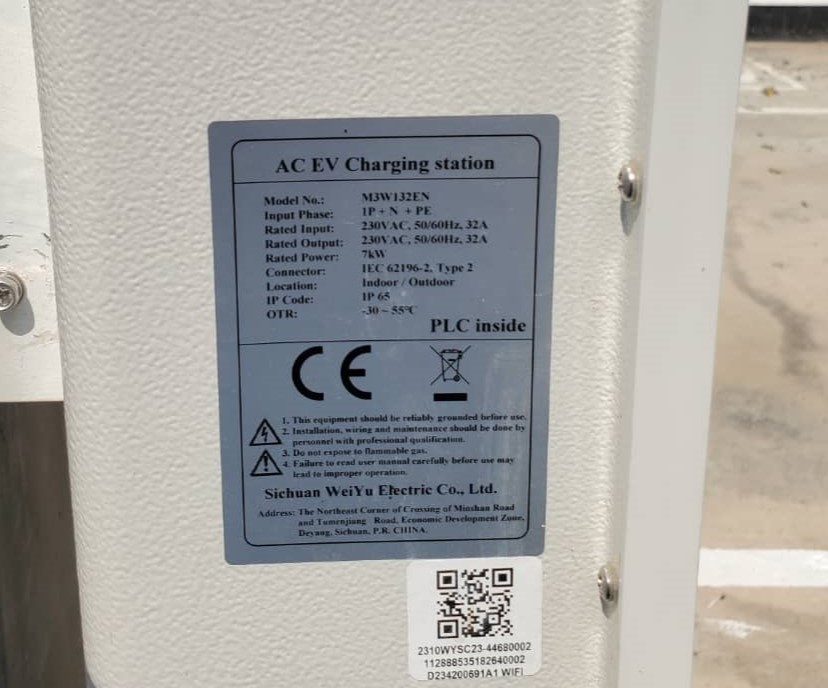

And the consumption of the EV been found to be about 0.2kW/km

Average THD Profile for EV Charging:
      minutes   PT
1435     1435  0.0
1436     1436  0.0
1437     1437  0.0
1438     1438  0.0
1439     1439  0.0


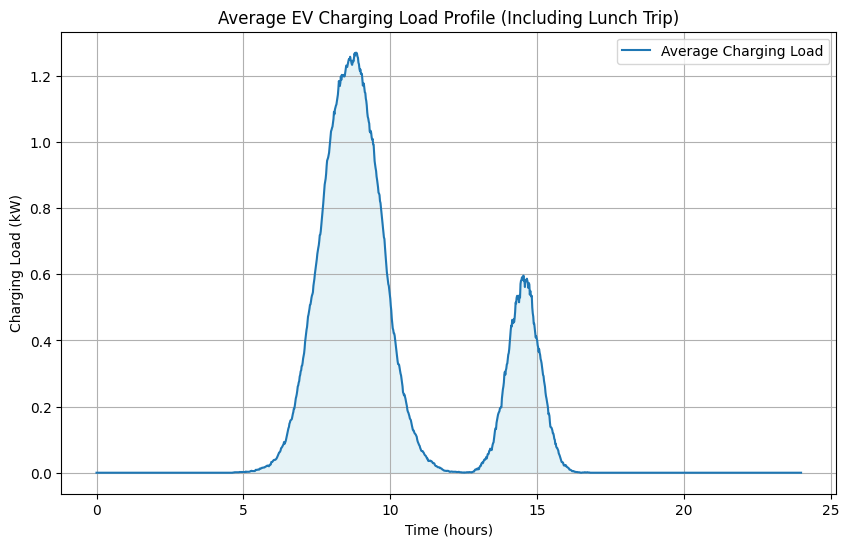

In [7]:
# Constants
charging_power = 7.2  # kW (Level 2 charger, 230V, 32A)
distance_morning_evening = 16  # km (total distance to and from work, morning and evening)
distance_lunch = 4  # km (distance to and from lunch)
energy_per_km = 0.2  # kWh per km
time_step = 1  # Time step of 1 minute
simulation_duration = 1440  # 1440 minutes = 1 day
n_iterations = 10000  # Monte Carlo iterations
average_speed = 36  # km/h

# Stochastic variables
mean_parking_time = 480  # Mean parking time (Li) in minutes
std_parking_time = 60  # Std deviation for parking time (Li)
mean_driving_time = 27  # Mean driving time (Di) in minutes
std_driving_time = 5  # Std deviation for driving time (Di)

lunch_start_time_mean, lunch_start_time_std = 780, 30  # 13:00 (780 minutes)
lunch_away_time_mean, lunch_time_away_std = 90, 15  # Most people have lunch for ~1:30 hours
energy_driving_mean, energy_driving_std = 48, 12  # Energy consumed to and from lunch

# Monte Carlo simulation for n_iterations iterations
load_profiles = np.zeros((n_iterations, simulation_duration))  # To store load profiles

for i in range(n_iterations):
    # Morning and Evening commute:
    # Generate random parking time (Li) and driving time (Di) from normal distributions
    Li = np.random.normal(mean_parking_time, std_parking_time)
    Di = np.random.normal(mean_driving_time, std_driving_time)

    # Ensure times are within realistic bounds
    Li = max(0, min(Li, simulation_duration))
    Di = max(0, min(Di, simulation_duration))

    # Calculate total energy consumed for morning and evening commute
    energy_consumed_morning_evening = distance_morning_evening * energy_per_km  # kWh

    # Time available for charging after morning-evening commute
    charging_start_time = Li + Di  # Time when charging begins
    charging_duration_morning_evening = energy_consumed_morning_evening / charging_power * 60  # Charging duration in minutes

    # Ensure charging doesn't exceed the simulation time
    charging_end_time = min(charging_start_time + charging_duration_morning_evening, simulation_duration)

    # Distribute charging load over time for morning and evening commute
    for t in range(int(charging_start_time), int(charging_end_time)):
        if t < simulation_duration:  # Ensure we stay within the simulation time
            load_profiles[i, t] = charging_power  # Charging at constant 7.2 kW


    # Lunch commute:
    # Generate random lunch starting time (Lst), lunch away time (Lat), and energy consumption during lunch commutes from normal distributions
    Lst = np.random.normal(lunch_start_time_mean, lunch_start_time_std)
    Lat = np.random.normal(lunch_away_time_mean, lunch_time_away_std)

    # Ensure lunch times are within realistic bounds
    Lst = max(0, min(Lst, simulation_duration))

    # Calculate total energy consumed during lunch commute
    energy_consumed_lunch = np.random.normal(energy_driving_mean, energy_driving_std)
    energy_consumed_lunch = max(0, min(energy_consumed_lunch, distance_lunch * energy_per_km))  # Ensuring energy is within realistic bounds

    # Find the time one starts charging after lunch
    charging_start_time_lunch = Lst + Lat
    charging_duration_lunch = energy_consumed_lunch / charging_power * 60  # Charging duration in minutes

    # Ensure lunch charging doesn't exceed the simulation time
    charging_end_time_lunch = min(charging_start_time_lunch + charging_duration_lunch, simulation_duration)

    # Distribute charging load over time for lunch trip
    for t in range(int(charging_start_time_lunch), int(charging_end_time_lunch)):
        if t < simulation_duration:  # Ensure we stay within the simulation time
            load_profiles[i, t] = charging_power  # Charging at constant 7.2 kW

# Calculate the average load profile over all iterations
average_load_profile_ev = np.mean(load_profiles, axis=0)

# Convert time axis from minutes to hours
time_in_hours_thd = np.arange(simulation_duration)
average_load_profile_ev_df = pd.DataFrame({
    'minutes': range(len(average_load_profile_ev)),
    'PT': average_load_profile_ev
})
print("Average THD Profile for EV Charging:")
print(average_load_profile_ev_df.tail())

# Convert time axis from minutes to hours
time_in_hours = np.arange(simulation_duration) / 60  # Convert minutes to hours

# Plot the average load profile
plt.figure(figsize=(10, 6))
plt.plot(time_in_hours, average_load_profile_ev, label='Average Charging Load')
plt.fill_between(time_in_hours, average_load_profile_ev, alpha=0.3, color='lightblue')
plt.title('Average EV Charging Load Profile (Including Lunch Trip)')
plt.xlabel('Time (hours)')  # Update x-axis label to hours
plt.ylabel('Charging Load (kW)')
plt.legend()
plt.grid(True)
plt.show()


## Combining of the two load profiles

Some inportant constants and imports

In [8]:
from scipy.integrate import solve_ivp

# number of EVs and hostels
N = 15  # Number of EVs
H = 24   # Number of hostels

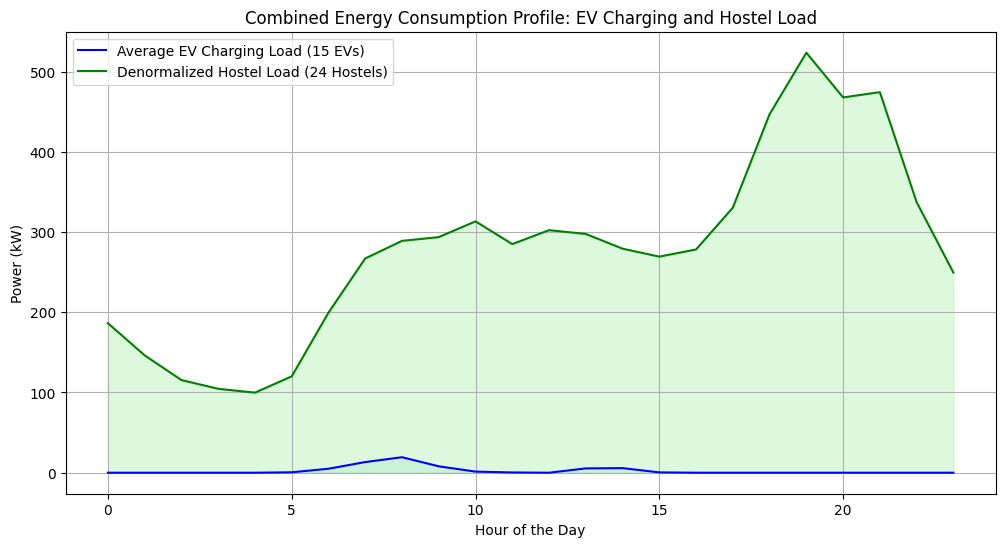

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Constants for EV simulation (You already have these in the first code block)
charging_power = 7.2  # kW (Level 2 charger, 230V, 32A)
distance_morning_evening = 16  # km
distance_lunch = 4  # km
energy_per_km = 0.2  # kWh per km
time_step = 1  # 1 hour time steps (already adjusted)
simulation_duration = 24  # Simulation now in hours
n_iterations = 1000  # Monte Carlo iterations

# User-defined variables (number of EVs and hostels)
N = 15  # Number of EVs
H = 24   # Number of hostels

# --- EV Load Simulation ---
# Placeholder for EV load profiles
load_profiles = np.zeros((n_iterations, simulation_duration))

for i in range(n_iterations):
    # Simulate parking, driving, lunch times, etc. (from first code block)
    Li = np.random.normal(480/60, 60/60)  # Parking time in hours
    Di = np.random.normal(27/60, 5/60)  # Driving time in hours
    energy_consumed_morning_evening = distance_morning_evening * energy_per_km

    # Morning/Evening charging profile
    charging_start_time = Li + Di
    charging_duration = energy_consumed_morning_evening / charging_power
    charging_end_time = min(charging_start_time + charging_duration, simulation_duration)

    for t in range(int(charging_start_time), int(charging_end_time)):
        if t < simulation_duration:
            load_profiles[i, t] = charging_power

    # Lunch charging profile
    Lst = np.random.normal(13, 0.5)  # Lunch start in hours (13:00)
    Lat = np.random.normal(1.5, 0.25)  # Lunch duration in hours
    energy_consumed_lunch = distance_lunch * energy_per_km
    charging_start_time_lunch = Lst + Lat
    charging_duration_lunch = energy_consumed_lunch / charging_power
    charging_end_time_lunch = min(charging_start_time_lunch + charging_duration_lunch, simulation_duration)

    for t in range(int(charging_start_time_lunch), int(charging_end_time_lunch)):
        if t < simulation_duration:
            load_profiles[i, t] = charging_power

# Scale EV load profile by number of EVs
average_ev_load_profile_day = np.mean(load_profiles, axis=0) * N

# --- Hostel Load Simulation ---
# Z-Score Normalization and Data Preparation functions from your second code block
def z_score_normalize(df):
    return (df - df.mean()) / df.std()

def reverse_z_score_normalize(df_normalized, original_df):
    return (df_normalized * original_df.std()) + original_df.mean()

def load_and_prepare_data_fc(file_path, time_column='Time'):
    df = pd.read_csv(file_path, low_memory=False)
    df[time_column] = pd.to_datetime(df[time_column], format='%m/%d/%Y %H:%M', errors='coerce')
    df = df.dropna(subset=[time_column])
    df['Hour'] = df[time_column].dt.hour
    df = df.set_index('Hour')
    hourly_data = df.groupby('Hour').mean()
    return hourly_data

# Load hostel data (assuming CSVs are already available and paths are correct)
df1_fc = load_and_prepare_data_fc("/content/drive/MyDrive/EV Final project/Mwansa's data/Mwanawasa Power & power factor.csv")
df2_fc = load_and_prepare_data_fc("/content/drive/MyDrive/EV Final project/Mwansa's data/October-3&4  Power & power factor.csv")
df3_fc = load_and_prepare_data_fc("/content/drive/MyDrive/EV Final project/Mwansa's data/President 2-6 Power & power factor (1).csv")
df4_fc = load_and_prepare_data_fc("/content/drive/MyDrive/EV Final project/Mwansa's data/Kaufe Block 5 Power Pf & Cos (2).csv")

df1_normalized = z_score_normalize(df1_fc.select_dtypes(include=['float64', 'int64']).apply(lambda x: x / 4))
df2_normalized = z_score_normalize(df2_fc.select_dtypes(include=['float64', 'int64']).apply(lambda x: x / 2))
df3_normalized = z_score_normalize(df3_fc.select_dtypes(include=['float64', 'int64']).apply(lambda x: x / 4))
df4_normalized = z_score_normalize(df4_fc.select_dtypes(include=['float64', 'int64']).apply(lambda x: x / 1))

merged_df_normalized = pd.concat([df1_normalized, df2_normalized, df3_normalized, df4_normalized], axis=1, keys=['File1', 'File2', 'File3', 'File4'])

merged_df_normalized['Average_PT'] = (merged_df_normalized['File1', 'PT'] +
                                      merged_df_normalized['File2', 'PT'] +
                                      merged_df_normalized['File3', 'PT'] +
                                      merged_df_normalized['File4', 'PT']) / 4

average_single_hostel_profile = reverse_z_score_normalize(merged_df_normalized['Average_PT'], df1['PT'])

# Scale hostel profile by number of hostels
average_hostel_load_profile = average_single_hostel_profile * H

# --- Plot both profiles together ---
plt.figure(figsize=(12, 6))

# Plot the EV load profile
plt.plot(range(simulation_duration), average_ev_load_profile_day, label=f'Average EV Charging Load ({N} EVs)', color='blue')
plt.fill_between(range(simulation_duration), average_ev_load_profile_day, alpha=0.3, color='lightblue')

# Plot the hostel load profile
plt.plot(average_hostel_load_profile.index, average_hostel_load_profile.values, label=f'Denormalized Hostel Load ({H} Hostels)', color='green')
plt.fill_between(average_hostel_load_profile.index, average_hostel_load_profile.values, alpha=0.3, color='lightgreen')

# Add titles and labels
plt.title('Combined Energy Consumption Profile: EV Charging and Hostel Load')
plt.xlabel('Hour of the Day')
plt.ylabel('Power (kW)')
plt.legend()
plt.grid(True)
plt.show()


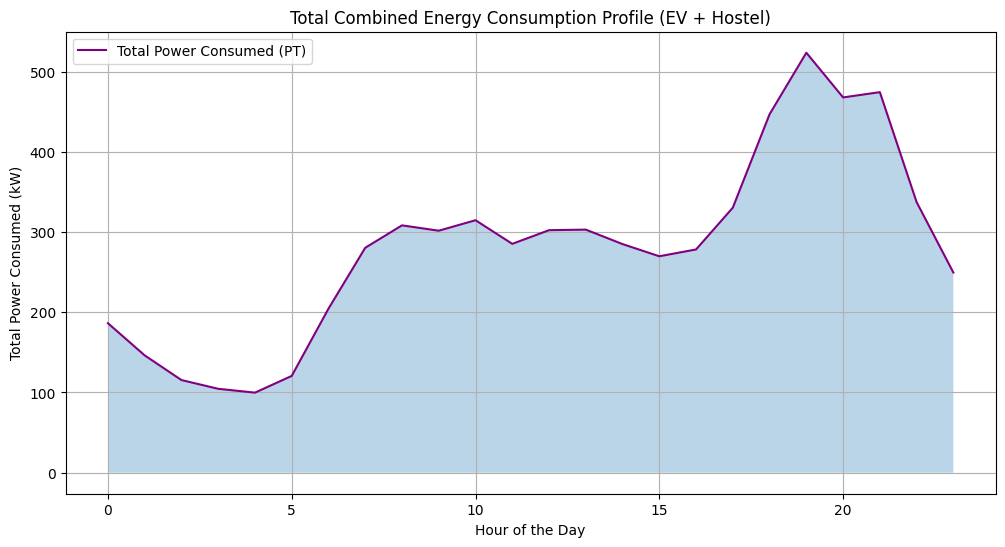

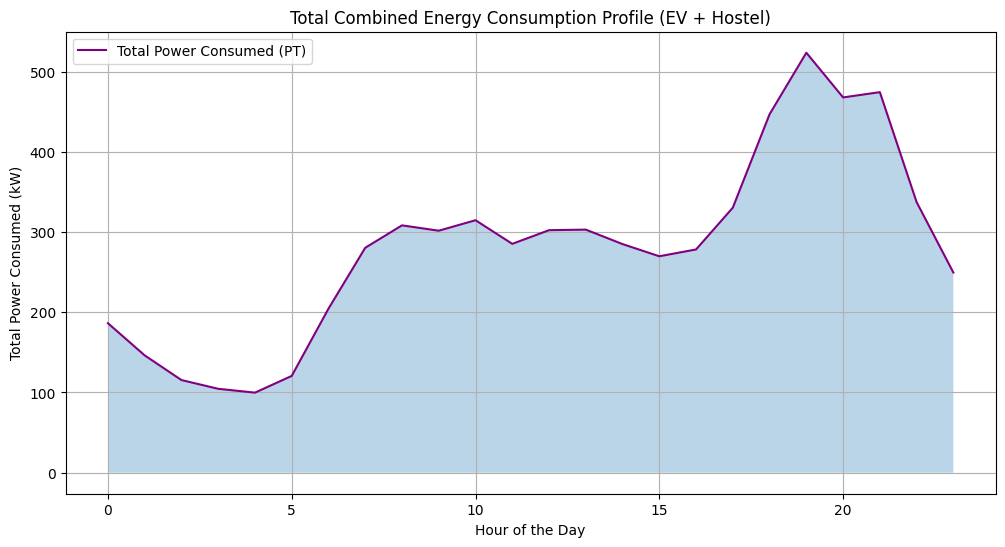

In [10]:
# Function to add both load profiles and return a DataFrame
def combine_load_profiles(N, H):

    # Ensure both profiles have the same time axis
    hours = np.arange(simulation_duration)

    # Combine the two load profiles
    total_load = average_ev_load_profile_day + average_hostel_load_profile.values

    # Create a DataFrame with Hours and Total Power (PT)
    load_df = pd.DataFrame({'Hour': hours, 'Total_PT': total_load})

    return load_df

# Function to plot the total load profile
def plot_combined_load_profile(load_df):
    plt.figure(figsize=(12, 6))

    # Plot the total load profile
    plt.plot(load_df['Hour'], load_df['Total_PT'], label='Total Power Consumed (PT)', color='purple')
    plt.fill_between(load_df['Hour'], load_df['Total_PT'], alpha=0.3,)

    # Add titles and labels
    plt.title('Total Combined Energy Consumption Profile (EV + Hostel)')
    plt.xlabel('Hour of the Day')
    plt.ylabel('Total Power Consumed (kW)')
    plt.legend()
    plt.grid(True)
    plt.show()

#load without EV
total_load_no_EV = combine_load_profiles(1, H)
plot_combined_load_profile(total_load_no_EV)
# Combine the profiles and get the dataframe
total_load_df = combine_load_profiles(N, H)

# Plot the result
plot_combined_load_profile(total_load_df)

total_load_df.to_csv("/content/drive/MyDrive/EV Final project/simulations/load analysis/UNZA_load_profile.csv", index=False)

After getting the the two load profiles combined together we had the following:
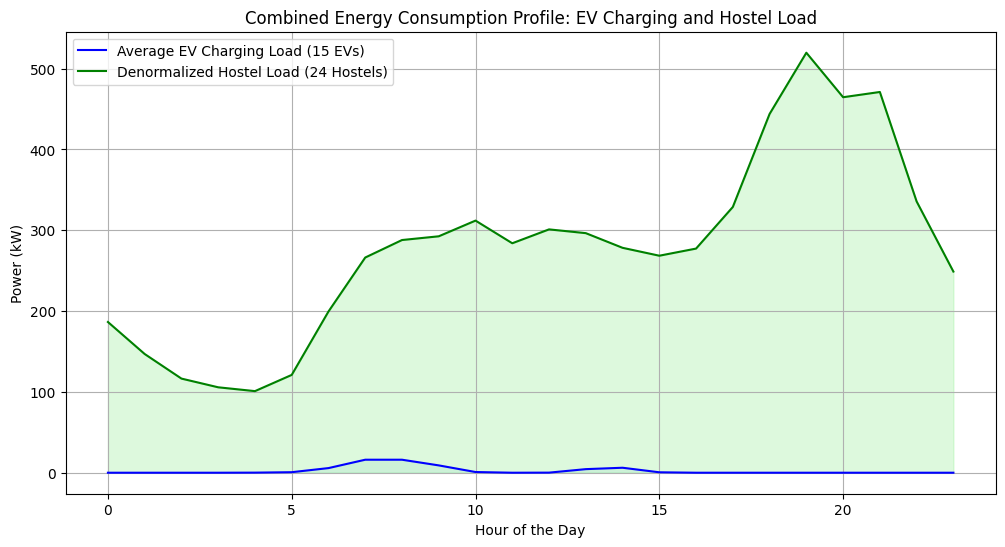

Giving the total load profile of:
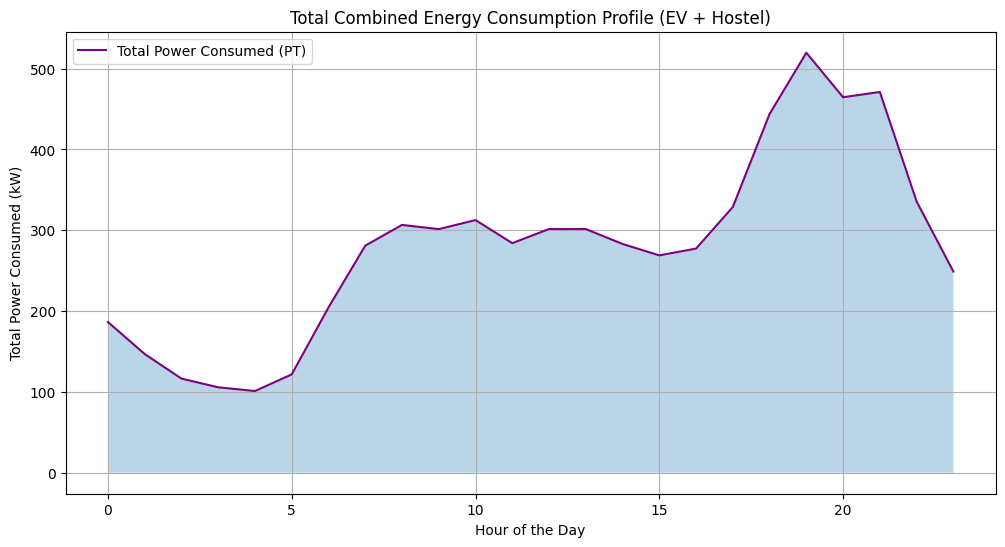


## Hostel THD Profile

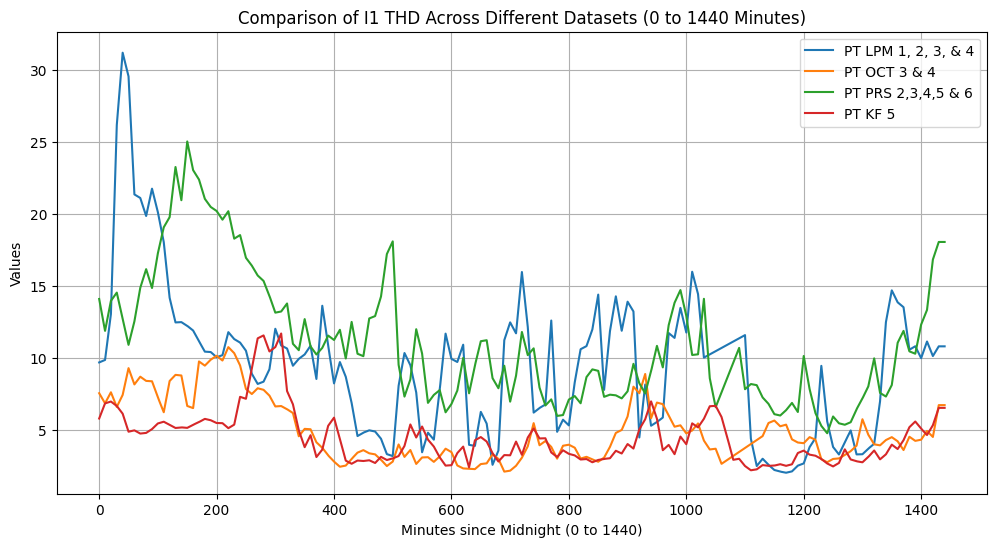

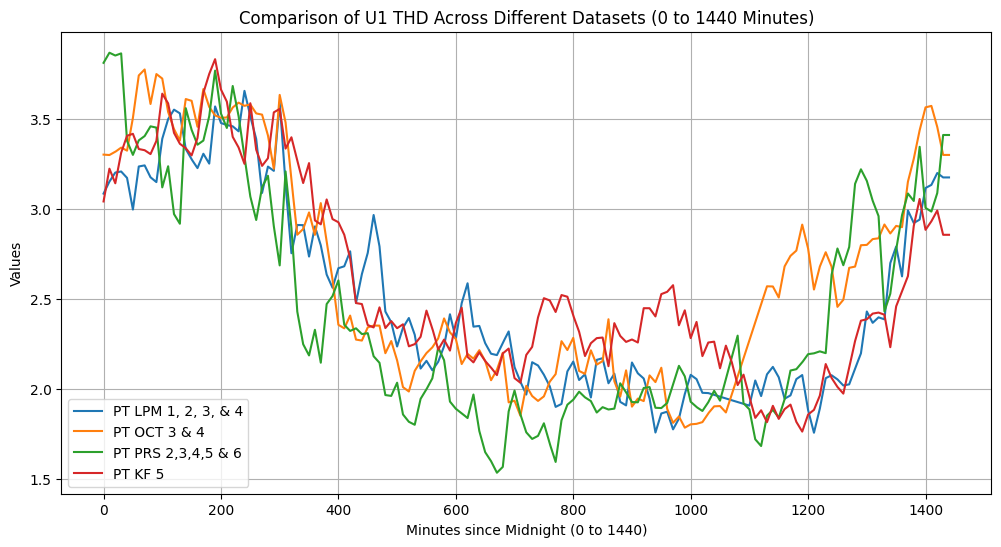

In [11]:
# Load and prepare the datasets
thd_df1 = load_and_prepare_data("/content/drive/MyDrive/EV Final project/Mwansa's data/Mwanawasa THD (1).csv")
thd_df2 = load_and_prepare_data("/content/drive/MyDrive/EV Final project/Mwansa's data/October-3&4  THD (1).csv")
thd_df3 = load_and_prepare_data("/content/drive/MyDrive/EV Final project/Mwansa's data/president 2- 6 THD.csv")
thd_df4 = load_and_prepare_data("/content/drive/MyDrive/EV Final project/Mwansa's data/Kaufe Block 5 THD (4).csv")

# Merge the datasets based on the 'Minutes' index
merged_df = pd.concat([thd_df1, thd_df2, thd_df3, thd_df4], axis=1, keys=['File1', 'File2', 'File3', 'File4'])

# Plot the comparison for a selected variable
plt.figure(figsize=(12, 6))

#plotting file I1 THD against minutes in a solid lines
plt.plot(merged_df['File1', 'I1 THD'], label='PT LPM 1, 2, 3, & 4')
plt.plot(merged_df['File2', 'I1 THD'], label='PT OCT 3 & 4')
plt.plot(merged_df['File3', 'I1 THD'], label='PT PRS 2,3,4,5 & 6')
plt.plot(merged_df['File4', 'I1 THD'], label='PT KF 5')


plt.title('Comparison of I1 THD Across Different Datasets (0 to 1440 Minutes)')
plt.xlabel('Minutes since Midnight (0 to 1440)')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

#plotting file U1 THD against minutes in a solid lines
# Plot the comparison for a selected variable
plt.figure(figsize=(12, 6))

#plotting file I1 THD against minutes in a solid lines
plt.plot(merged_df['File1', 'U1 THD'], label='PT LPM 1, 2, 3, & 4')
plt.plot(merged_df['File2', 'U1 THD'], label='PT OCT 3 & 4')
plt.plot(merged_df['File3', 'U1 THD'], label='PT PRS 2,3,4,5 & 6')
plt.plot(merged_df['File4', 'U1 THD'], label='PT KF 5')


plt.title('Comparison of U1 THD Across Different Datasets (0 to 1440 Minutes)')
plt.xlabel('Minutes since Midnight (0 to 1440)')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

A clear parttern is seen in U1 THD. Hence U1 THD is used

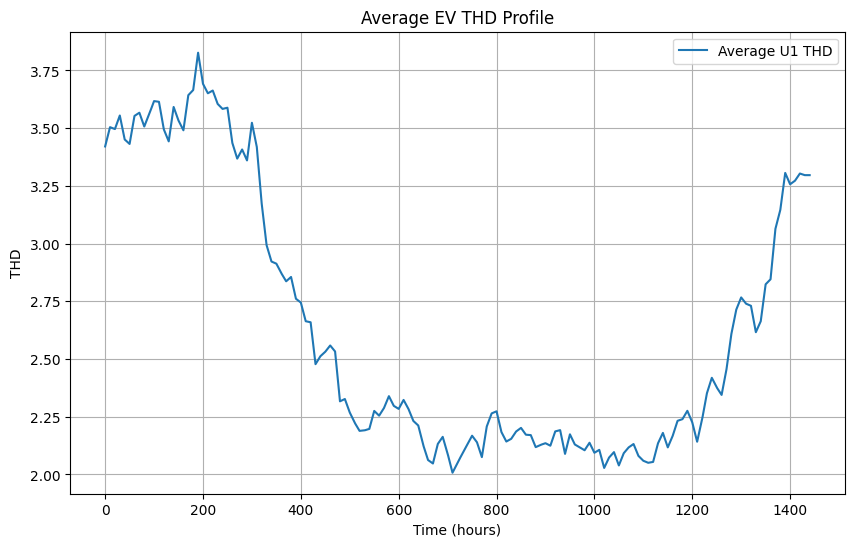

In [12]:
# Normalize the data for each file based on the number of hostels (apply only to numeric columns)
thd_df1_normalized = z_score_normalize(thd_df1.select_dtypes(include=['float64', 'int64']).apply(lambda x: x / 4))  # File1 has 4 hostels
thd_df2_normalized = z_score_normalize(thd_df2.select_dtypes(include=['float64', 'int64']).apply(lambda x: x / 2))  # File2 has 2 hostels
thd_df3_normalized = z_score_normalize(thd_df3.select_dtypes(include=['float64', 'int64']).apply(lambda x: x / 4))  # File3 has 4 hostels
thd_df4_normalized = z_score_normalize(thd_df4.select_dtypes(include=['float64', 'int64']).apply(lambda x: x / 1))  # File4 has 1 hostel

# Merge the normalized datasets based on the 'Hour' index
merged_thd_df_normalized = pd.concat([thd_df1_normalized, thd_df2_normalized, thd_df3_normalized, thd_df4_normalized], axis=1, keys=['File1', 'File2', 'File3', 'File4'])

# Calculate the average PT across all normalized hostels
merged_thd_df_normalized['Average_U1_THD'] = (merged_thd_df_normalized['File1', 'U1 THD'] +
                                      merged_thd_df_normalized['File2', 'U1 THD'] +
                                      merged_thd_df_normalized['File3', 'U1 THD'] +
                                      merged_thd_df_normalized['File4', 'U1 THD']) / 4  # Taking the average of U1 THHD

# De-normalize the average to get back to the original scale
average_single_hostel_thd = reverse_z_score_normalize(merged_thd_df_normalized['Average_U1_THD'], thd_df2['U1 THD'])



# Plot the average load profile
plt.figure(figsize=(10, 6))
plt.plot(average_single_hostel_thd, label='Average U1 THD')
# plt.fill_between(time_in_hours,average_single_hostel_thd, alpha=0.3, color='lightblue')
plt.title('Average EV THD Profile')
plt.xlabel('Time (hours)')  # Update x-axis label to hours
plt.ylabel('THD')
plt.legend()
plt.grid(True)
plt.show()

## EV THD Profile

["The worst case hypothetical EV charger model was constructed by using maximum permissible values from the International Electrotechnical Commission (IEC) 1000–3-4 recommended limits for harmonic currents for equipment. This simulated charger current waveform in Fig. 1 has a current THD of 17.3%. These limits have been adopted in the form of an IWC Record of Consensus (ROC) recommendation for EV charger current distortion. The worst case scenario also assumed that all EV owners used the same EV charger, removing the effects of harmonic phase cancellation."](https://ieeexplore.ieee.org/abstract/document/916965)

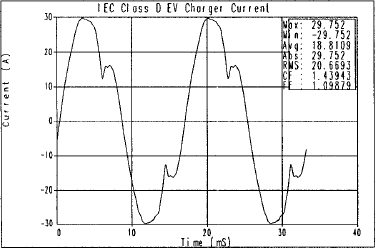

["For the marginal case scenario, an actual commercial charger with the highest current THD (Honda EV charger with 14.3% THD) was used, as compared to the worst case simulation scenario charger with 17.3% current THD. The other parameters (system data and the appliances) remained the same, as in the worst case simulation scenario. The charger's current waveform appears in Fig. 4 and the results in Table D."](https://ieeexplore.ieee.org/abstract/document/916965)
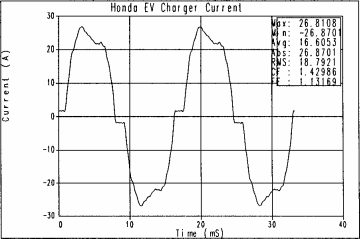




Average THD Profile for EV Charging:
      minutes  THD
1436     1436  0.0
1437     1437  0.0
1438     1438  0.0
1439     1439  0.0
1440     1440  0.0


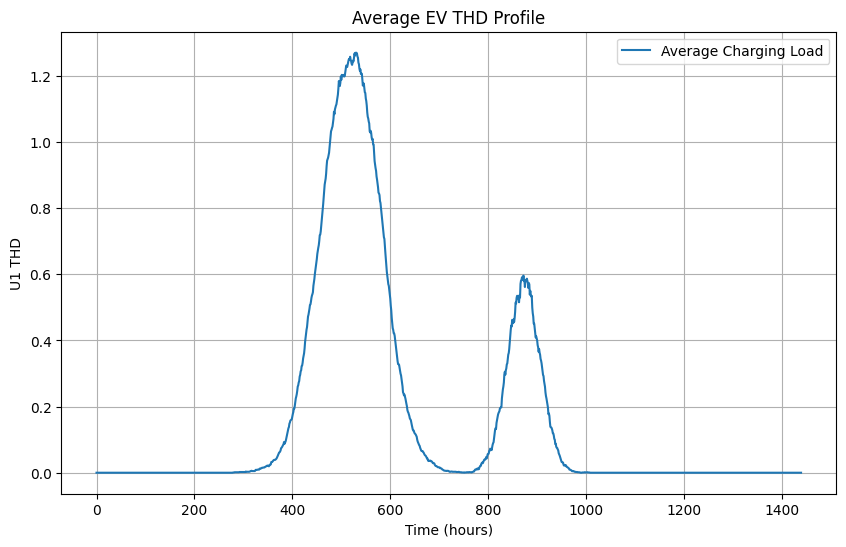

In [13]:
# Constants
charging_THD = 14.3
simulation_duration = 1441

# Monte Carlo simulation for n_iterations iterations
thd_profiles = np.zeros((n_iterations, simulation_duration))  # To store load profiles

for i in range(n_iterations):
    # Morning and Evening commute:
    # Generate random parking time (Li) and driving time (Di) from normal distributions
    Li = np.random.normal(mean_parking_time, std_parking_time)
    Di = np.random.normal(mean_driving_time, std_driving_time)

    # Ensure times are within realistic bounds
    Li = max(0, min(Li, simulation_duration))
    Di = max(0, min(Di, simulation_duration))

    # Calculate total energy consumed for morning and evening commute
    energy_consumed_morning_evening = distance_morning_evening * energy_per_km  # kWh

    # Time available for charging after morning-evening commute
    charging_start_time = Li + Di  # Time when charging begins
    charging_duration_morning_evening = energy_consumed_morning_evening / charging_power * 60  # Charging duration in minutes

    # Ensure charging doesn't exceed the simulation time
    charging_end_time = min(charging_start_time + charging_duration_morning_evening, simulation_duration)

    # Distribute charging thd over time for morning and evening commute
    for t in range(int(charging_start_time), int(charging_end_time)):
        if t < simulation_duration:  # Ensure we stay within the simulation time
            thd_profiles[i, t] = charging_THD

    # Lunch commute:
    # Generate random lunch starting time (Lst), lunch away time (Lat), and energy consumption during lunch commutes from normal distributions
    Lst = np.random.normal(lunch_start_time_mean, lunch_start_time_std)
    Lat = np.random.normal(lunch_away_time_mean, lunch_time_away_std)

    # Ensure lunch times are within realistic bounds
    Lst = max(0, min(Lst, simulation_duration))

    # Calculate total energy consumed during lunch commute
    energy_consumed_lunch = np.random.normal(energy_driving_mean, energy_driving_std)
    energy_consumed_lunch = max(0, min(energy_consumed_lunch, distance_lunch * energy_per_km))  # Ensuring energy is within realistic bounds

    # Find the time one starts charging after lunch
    charging_start_time_lunch = Lst + Lat
    charging_duration_lunch = energy_consumed_lunch / charging_power * 60  # Charging duration in minutes

    # Ensure lunch charging doesn't exceed the simulation time
    charging_end_time_lunch = min(charging_start_time_lunch + charging_duration_lunch, simulation_duration)

    # Distribute charging load over time for lunch trip
    for t in range(int(charging_start_time_lunch), int(charging_end_time_lunch)):
        if t < simulation_duration:  # Ensure we stay within the simulation time
            thd_profiles[i, t] = charging_power

# Calculate the average load profile over all iterations
average_thd_profile_ev = np.mean(thd_profiles, axis=0)

# Convert time axis from minutes to hours
time_in_hours_thd = np.arange(simulation_duration)
average_thd_profile_ev = pd.DataFrame({
    'minutes': range(len(average_thd_profile_ev)),
    'THD': average_thd_profile_ev
})
print("Average THD Profile for EV Charging:")
print(average_thd_profile_ev.tail())

# Plot the average load profile
plt.figure(figsize=(10, 6))
plt.plot(average_load_profile_ev, label='Average Charging Load')
plt.title('Average EV THD Profile')
plt.xlabel('Time (hours)')  # Update x-axis label to hours
plt.ylabel('U1 THD')
plt.legend()
plt.grid(True)
plt.show()

Using openDSS for Harmonic Analysis

In [14]:
%pip install "OpenDSSDirect.py[extras]"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.0/232.0 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.0/22.0 MB 60.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 392.0/392.0 kB 33.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.9/101.9 kB 11.0 MB/s eta 0:00:00


In [15]:
import opendssdirect as dss

In [16]:
thd_hostel = average_single_hostel_thd
thd_ev = average_thd_profile_ev
print(thd_hostel.head())
print(thd_ev.head())

0    3.420855
1    3.429215
2    3.437574
3    3.445934
4    3.454294
Name: Average_U1_THD, dtype: float64
   minutes  THD
0        0  0.0
1        1  0.0
2        2  0.0
3        3  0.0
4        4  0.0


In [17]:
thd_hostel = average_single_hostel_thd.reset_index(drop=True)

# Create a new DataFrame for thd_hostel with appropriate column name
thd_hostel_df = pd.DataFrame({
    'minutes': range(len(thd_hostel)),  # Create a 'minutes' column from 0 to n
    'THD': thd_hostel
})

# Print both DataFrames to compare
print("Hostel THD DataFrame:")
print(thd_hostel_df.tail())
print("\nEV THD DataFrame:")
print(thd_ev.tail())

Hostel THD DataFrame:
      minutes       THD
1436     1436  3.296606
1437     1437  3.296606
1438     1438  3.296606
1439     1439  3.296606
1440     1440  3.296606

EV THD DataFrame:
      minutes  THD
1436     1436  0.0
1437     1437  0.0
1438     1438  0.0
1439     1439  0.0
1440     1440  0.0


In [18]:
# Check types and structure of the DataFrames
print(type(thd_hostel_df), thd_hostel.head())
print(type(thd_ev), thd_ev.size)

<class 'pandas.core.frame.DataFrame'> 0    3.420855
1    3.429215
2    3.437574
3    3.445934
4    3.454294
Name: Average_U1_THD, dtype: float64
<class 'pandas.core.frame.DataFrame'> 2882


In [119]:

# Initialize OpenDSS
dss.Basic.ClearAll()
dss.Text.Command("Set DefaultBaseFrequency=60")

# dss.Text.Command("new circuit.mycktname")

# Define the circuit in OpenDSS
dss.Text.Command("new object=circuit.NetworkWithEVandHostel")
dss.Text.Command("~ basekv=115 1.00 0.0 60.0 3 20000 21000 4.0 3.0")
dss.Text.Command("new transformer.sub phases=3 windings=2 buses=(SourceBus subbus) conns='delta wye' kvs='115 12.47' kvas='20000 20000' XHL=7")
dss.Text.Command("new linecode.336MCM nphases=3")
dss.Text.Command("~ rmatrix=(0.0868455 | 0.0298305 0.0887966 | 0.0288883 0.0298305 0.0868455)")
dss.Text.Command("~ xmatrix=(0.2025449 | 0.0847210 0.1961452 | 0.0719161 0.0847210 0.2025449)")
dss.Text.Command("~ cmatrix=(2.74 | -0.70 2.96 | -0.34 -0.71 2.74)")
dss.Text.Command("~ Normamps=400 Emergamps=600")
dss.Text.Command("new line.line1 bus1=subbus bus2=loadbus1 linecode=336MCM length=10 units=kft")
dss.Text.Command("new line.line2 bus1=loadbus1 bus2=loadbus2 linecode=336MCM length=15 units=kft")

# Extract load profile column as a list
load_profileEV = average_load_profile_ev_df['PT'].tolist()
load_profileH = average_load_profile_h_df['PT'].tolist()

# Check the values in load profiles
print(load_profileEV[1439])  # Ensure valid data
print(load_profileH[1439])   # Ensure valid data

# Define LoadShape for HostelLoad
mult_strH = f"mult=({','.join(map(str, load_profileH))})"  # Convert list to string
dss.Text.Command(f"new LoadShape.HostelLoadD npts={len(load_profileH)} interval=1 {mult_strH}")

# Define LoadShape for EVCarPark
mult_strEV = f"mult=({','.join(map(str, load_profileEV))})"  # Convert list to string
dss.Text.Command(f"new LoadShape.EVCarParkD npts={len(load_profileEV)} interval=1 {mult_strEV}")

# Set up the loads with their respective load shapes
dss.Text.Command("new Load.HostelLoad bus1=loadbus1 phases=3 kv=12.47 kw=800 pf=1 model=1 class=1 daily=HostelLoadD status=fixed")
dss.Text.Command("new Load.EVCarPark bus1=loadbus2 phases=3 kv=12.47 kw=1200 pf=1 model=1 class=2 daily=EVCarParkD status=fixed")

# Add a monitor for THD specifically (monitoring at the bus or a load)
dss.Text.Command("New Monitor.THDMon element=transformer.sub terminal=1 mode=5")  # mode=5 is for harmonics

# Add monitors for the loads
dss.Text.Command("new monitor.HostelLoadMon element=load.HostelLoad terminal=1 mode=0")
dss.Text.Command("new monitor.EVCarParkMon element=load.EVCarPark terminal=1 mode=0")

# Set the export path for OpenDSS
export_path = "/content/drive/MyDrive/EV Final project/simulations/openDSS_results"
dss.Text.Command(f'Set DataPath="{export_path}"')

# Set voltage bases before solving
dss.Text.Command("Set voltagebases=[115, 12.47]")
dss.Text.Command("Calcv")
dss.Solution.Solve()

# Solve for duty cycle with harmonics
dss.Text.Command("Set mode=duty")
dss.Text.Command("Set number=1440")
dss.Solution.Solve()

# Export results after solving
dss.Text.Command("Export monitor HostelLoadMon")
dss.Text.Command("Export monitor EVCarParkMon")

# Define a function to set harmonic spectra based on THD value
def set_harmonic_spectrum(thd):
    h5 = thd * 0.5  # 50% to 5th harmonic
    h7 = thd * 0.3  # 30% to 7th harmonic
    h11 = thd * 0.15  # 15% to 11th harmonic
    h13 = thd * 0.05  # 5% to 13th harmonic
    return f"New Spectrum.DynamicSpectrum harmonic=(1, 5, 7, 11, 13) %mag=(1, {h5}, {h7}, {h11}, {h13})"

# Solve for each hour and update THD
for hour in range(1440):
    # Retrieve the hourly THD values from CSV
    hostel_thd = thd_hostel_df.iloc[hour]['THD']  # Replace 'THD' with actual column name
    ev_thd = thd_ev.iloc[hour]['THD']             # Replace 'THD' with actual column name

    # Generate harmonic spectra for each load
    hostel_spectrum = set_harmonic_spectrum(hostel_thd)
    ev_spectrum = set_harmonic_spectrum(ev_thd)

    # Define harmonic spectra for each load
    dss.Text.Command(f"{hostel_spectrum}")
    dss.Text.Command("Edit Load.HostelLoad spectrum=DynamicSpectrum")

    dss.Text.Command(f"{ev_spectrum}")
    dss.Text.Command("Edit Load.EVCarPark spectrum=DynamicSpectrum")

    # Setting the DSS mode to harmonics
    dss.Text.Command("Set Mode=Harmonics")
    dss.Solution.Solve()

    # Export THD results at the end of the simulation
    dss.Text.Command("Export monitor THDMon")

0.0
10.369589980094917


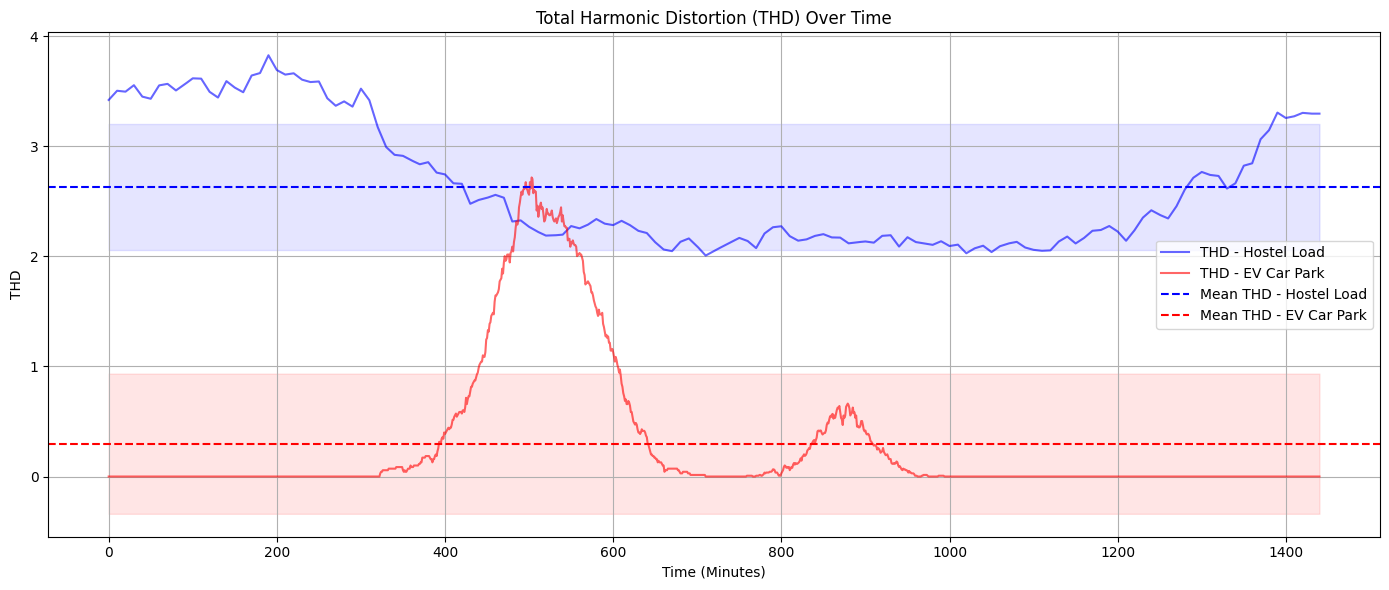

T-statistic: 103.3471034639569, P-value: 0.0


  0%|          | 1/1440 [27:52<668:36:30, 1672.68s/it]


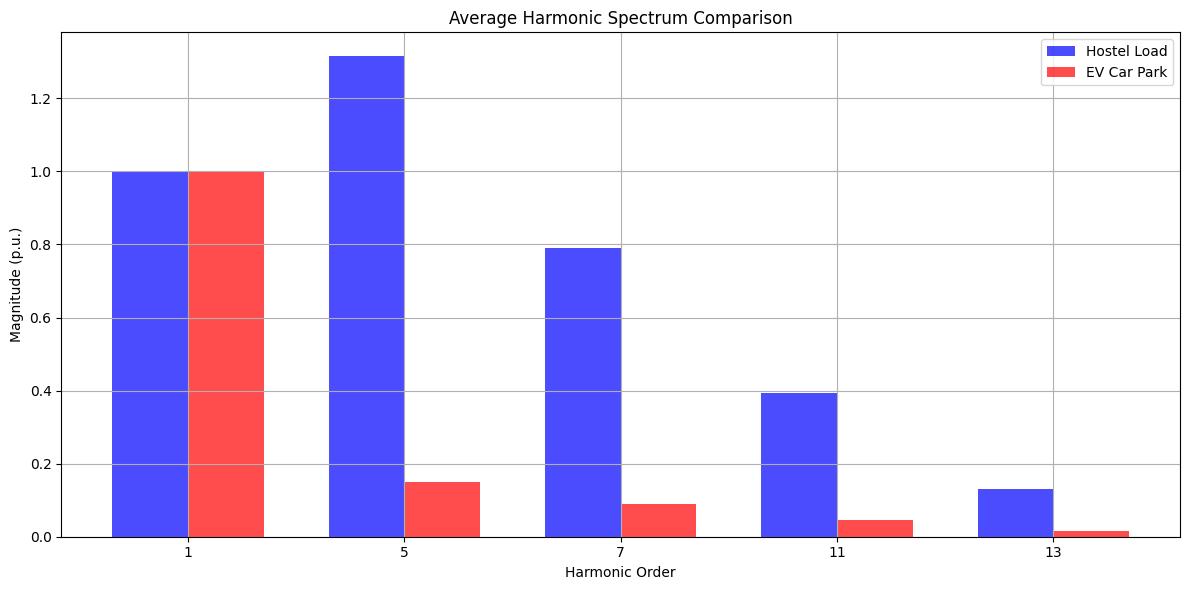

In [120]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

# Assuming thd_hostel_df and thd_ev_df are already defined and contain 'THD' column
# Let's assume they contain a column 'Hour' for the time index

# Create time axis for the plots (1 minute intervals for 1440 minutes)
time = range(1441)  # 1440 minutes for a full day

# Extract THD values for both loads
hostel_thd = thd_hostel_df['THD'].values  # Convert to NumPy array for calculations
ev_thd = thd_ev['THD'].values          # Convert to NumPy array for calculations

# Calculate mean and standard deviation
mean_hostel_thd = np.mean(hostel_thd)
std_hostel_thd = np.std(hostel_thd)

mean_ev_thd = np.mean(ev_thd)
std_ev_thd = np.std(ev_thd)

# Plot THD over time with error bars
plt.figure(figsize=(14, 6))
plt.plot(time, hostel_thd, label='THD - Hostel Load', color='blue', alpha=0.6)
plt.plot(time, ev_thd, label='THD - EV Car Park', color='red', alpha=0.6)

# Adding mean and standard deviation shaded area
plt.fill_between(time, mean_hostel_thd - std_hostel_thd, mean_hostel_thd + std_hostel_thd, color='blue', alpha=0.1)
plt.fill_between(time, mean_ev_thd - std_ev_thd, mean_ev_thd + std_ev_thd, color='red', alpha=0.1)

plt.axhline(mean_hostel_thd, color='blue', linestyle='--', label='Mean THD - Hostel Load')
plt.axhline(mean_ev_thd, color='red', linestyle='--', label='Mean THD - EV Car Park')

plt.title('Total Harmonic Distortion (THD) Over Time')
plt.xlabel('Time (Minutes)')
plt.ylabel('THD')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# Statistical comparison of total THD
t_stat, p_value = stats.ttest_ind(hostel_thd, ev_thd)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

# Function to generate harmonic spectrum based on THD
def set_harmonic_spectrum(thd):
    h5 = thd * 0.5  # 50% to 5th harmonic
    h7 = thd * 0.3  # 30% to 7th harmonic
    h11 = thd * 0.15  # 15% to 11th harmonic
    h13 = thd * 0.05  # 5% to 13th harmonic
    return [1, h5, h7, h11, h13]  # Return harmonics as a list

# Generate harmonic spectra for both loads
hostel_harmonics = [set_harmonic_spectrum(thd) for thd in hostel_thd]
ev_harmonics = [set_harmonic_spectrum(thd) for thd in ev_thd]

# Average harmonic values over the simulation period for comparison
average_hostel_harmonics = np.mean(hostel_harmonics, axis=0)
average_ev_harmonics = np.mean(ev_harmonics, axis=0)

# Harmonic orders to plot
harmonic_orders = [1, 5, 7, 11, 13]

# Plot harmonic spectra comparison
plt.figure(figsize=(12, 6))
bar_width = 0.35
x = np.arange(len(harmonic_orders))

plt.bar(x - bar_width/2, average_hostel_harmonics, width=bar_width, color='blue', alpha=0.7, label='Hostel Load')
plt.bar(x + bar_width/2, average_ev_harmonics, width=bar_width, color='red', alpha=0.7, label='EV Car Park')

plt.title('Average Harmonic Spectrum Comparison')
plt.xlabel('Harmonic Order')
plt.ylabel('Magnitude (p.u.)')
plt.xticks(x, harmonic_orders)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


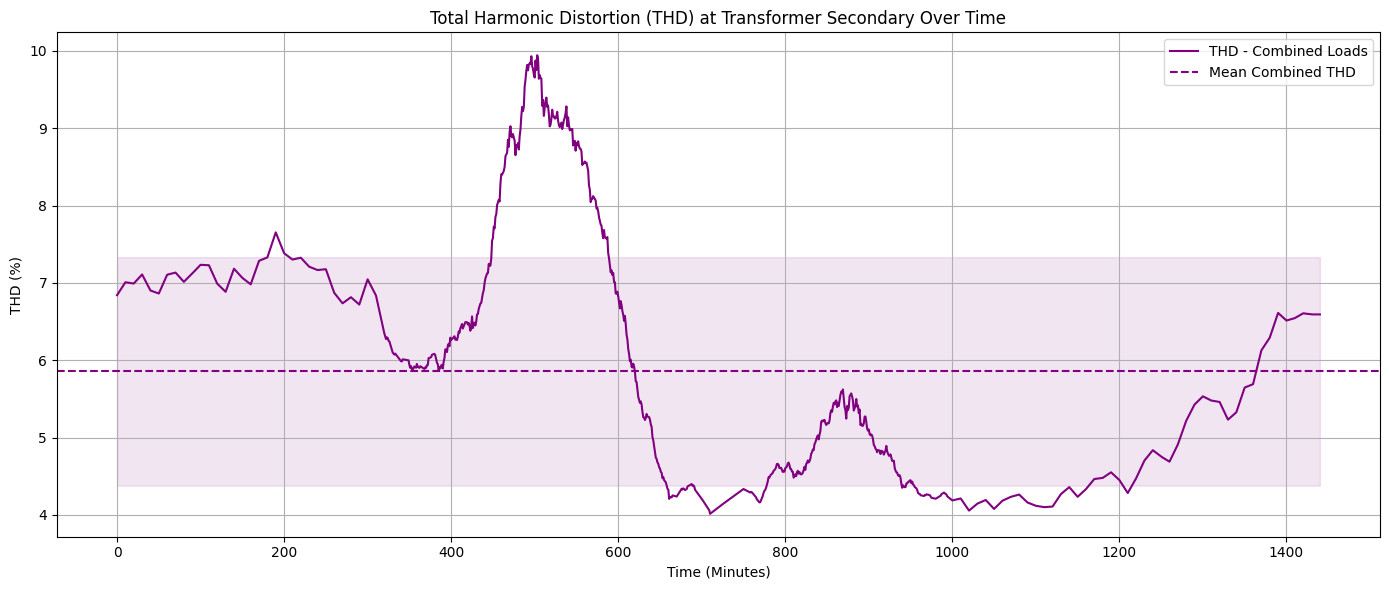

Mean Combined THD: 5.86
Standard Deviation of Combined THD: 1.48


In [124]:
import numpy as np
import matplotlib.pyplot as plt

# Function to generate harmonic spectrum based on THD
def set_harmonic_spectrum(thd):
    h5 = thd * 0.5  # 50% to 5th harmonic
    h7 = thd * 0.3   # 30% to 7th harmonic
    h11 = thd * 0.15  # 15% to 11th harmonic
    h13 = thd * 0.05  # 5% to 13th harmonic
    return [1, h5, h7, h11, h13]  # Return harmonics as a list

# Generate harmonic spectra for both loads
hostel_harmonics = [set_harmonic_spectrum(thd) for thd in hostel_thd]
ev_harmonics = [set_harmonic_spectrum(thd) for thd in ev_thd]

# Combine harmonic contributions
combined_harmonics = []

for hostel, ev in zip(hostel_harmonics, ev_harmonics):
    combined = [
        hostel[0] + ev[0],  # 1st harmonic
        (hostel[1] + ev[1]),  # 5th harmonic
        (hostel[2] + ev[2]),  # 7th harmonic
        (hostel[3] + ev[3]),  # 11th harmonic
        (hostel[4] + ev[4])   # 13th harmonic
    ]
    combined_harmonics.append(combined)

# Convert to NumPy array for easier calculations
combined_harmonics = np.array(combined_harmonics)

# Calculate combined THD for each time step
combined_thd = np.sqrt((combined_harmonics[:, 1]/.5)**2  + (combined_harmonics[:, 2]/.3)**2 +
                        (combined_harmonics[:, 3]/.15)**2 + (combined_harmonics[:, 4]/.05)**2)

# Calculate average combined THD
mean_combined_thd = np.mean(combined_thd)
std_combined_thd = np.std(combined_thd)

# Plot Combined THD over time
plt.figure(figsize=(14, 6))
plt.plot(range(1441), combined_thd, label='THD - Combined Loads', color='purple')
plt.axhline(mean_combined_thd, color='purple', linestyle='--', label='Mean Combined THD')

# Adding mean and standard deviation shaded area
plt.fill_between(range(1441), mean_combined_thd - std_combined_thd, mean_combined_thd + std_combined_thd,
                 color='purple', alpha=0.1)

plt.title('Total Harmonic Distortion (THD) at Transformer Secondary Over Time')
plt.xlabel('Time (Minutes)')
plt.ylabel('THD (%)')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# Output mean and std for combined THD
print(f"Mean Combined THD: {mean_combined_thd:.2f}")
print(f"Standard Deviation of Combined THD: {std_combined_thd:.2f}")


# Objectives

## Transfomer Lifespan Analysis

In [22]:
# Transformer and thermal constants (you may need to adjust these based on actual transformer data)
transformer_size = 500  # Transformer rated size (kVA)
x = 0.8
exponent_y = 1.6
R = 8
k11 = 1
k21 = 1
k22 = 2
tau_w = 4  # Winding time constant (hours)
tau_o = 180  # Oil time constant (hours)
delta_theta_or = 45  # Top-oil rise at rated losses (°C)
delta_theta_hr = 45  # Hot-spot-to-oil gradient at rated current (°C)
theta_alpha = 30  # Ambient temperature (constant, °C)
transformer_lifetime_hours = 65000  #Assuming a transformer's lifetime at 50% retained tensile strength is 65000 hours.

# Assuming 'total_load_df' is already defined and contains the 'Total_PT' column
# Calculating the load factor K
K = total_load_df['Total_PT'] / transformer_size

K_no_EV = total_load_no_EV['Total_PT'] / transformer_size

# Prepare DataFrame for K values
K_df = pd.DataFrame({
    'hour': range(24),
    'K': K  # The load factor K over 24 hours
})

K_df_no_EV = pd.DataFrame({
    'hour': range(24),
    'K': K_no_EV  # The load factor K over 24 hours
})

In [23]:
# Initial conditions
theta_o_init = 25  # Initial top-oil temperature (°C)
Delta_theta_h1_init = 20  # Initial hot-spot temperature rise (part 1)
Delta_theta_h2_init = 10  # Initial hot-spot temperature rise (part 2)

# Time range for 24 hours
t_span = [0, 24]
t_eval = np.linspace(0, 24, 1000)  # Time points where the solution is evaluated

In [24]:
def thermal_model(t, y, K_df):
    theta_o, Delta_theta_h1, Delta_theta_h2 = y

    # Interpolating K for the current time t (ensure this is a scalar)
    K_t = float(np.interp(t, K_df['hour'], K_df['K']))

    # Top-oil temperature differential equation (ensure scalars are returned)
    dtheta_o_dt = ((1 + K_t**2 * R )/ (1 + R))**x * delta_theta_or / (k11 * tau_o) - (theta_o - theta_alpha) / tau_o

    # Hot-spot temperature rise equations (ensure scalars are returned)
    dDelta_theta_h1_dt = (k21 * K_t**exponent_y * delta_theta_hr - Delta_theta_h1) / (k22 * tau_w)
    dDelta_theta_h2_dt = ((k21 - 1) * K_t**exponent_y * delta_theta_hr - Delta_theta_h2) / (tau_o * k22)

    # Return the rates of change as a list of scalars
    return [dtheta_o_dt, dDelta_theta_h1_dt, dDelta_theta_h2_dt]

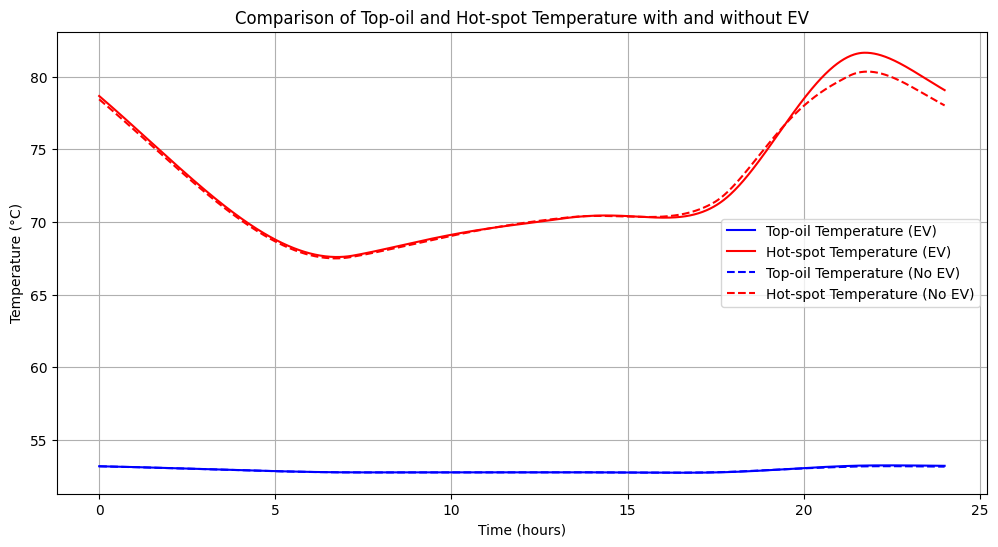

In [25]:
num_days = 365*30  # Number of iterations (days)
# Loop for EV case
for day in range(num_days):
    # Solve the ODEs for this day
    sol = solve_ivp(
        thermal_model, t_span, [theta_o_init, Delta_theta_h1_init, Delta_theta_h2_init],
        t_eval=t_eval, args=(K_df,)
    )

    # Extract the final conditions at the end of the day (last time step)
    theta_o_final = sol.y[0, -1]
    Delta_theta_h1_final = sol.y[1, -1]
    Delta_theta_h2_final = sol.y[2, -1]

    # Update the initial conditions for the next day with the final conditions of this day
    theta_o_init = theta_o_final
    Delta_theta_h1_init = Delta_theta_h1_final
    Delta_theta_h2_init = Delta_theta_h2_final

# After the iterations are done, you can use the final initial condition
# to solve the ODE one last time for the converged state
sol_final = solve_ivp(
    thermal_model, t_span, [theta_o_init, Delta_theta_h1_init, Delta_theta_h2_init],
    t_eval=t_eval, args=(K_df,)
)

theta_o_init_no_EV, Delta_theta_h1_init_no_EV, Delta_theta_h2_init_no_EV = theta_o_init, Delta_theta_h1_init, Delta_theta_h2_init

for day in range(num_days):
    # Solve the ODEs for this day without EV
    sol_no_EV = solve_ivp(
        thermal_model, t_span, [theta_o_init_no_EV, Delta_theta_h1_init_no_EV, Delta_theta_h2_init_no_EV],
        t_eval=t_eval, args=(K_df_no_EV,)
    )

    # Extract the final conditions at the end of the day (last time step)
    theta_o_final_no_EV = sol_no_EV.y[0, -1]
    Delta_theta_h1_final_no_EV = sol_no_EV.y[1, -1]
    Delta_theta_h2_final_no_EV = sol_no_EV.y[2, -1]

    # Update the initial conditions for the next day
    theta_o_init_no_EV = theta_o_final_no_EV
    Delta_theta_h1_init_no_EV = Delta_theta_h1_final_no_EV
    Delta_theta_h2_init_no_EV = Delta_theta_h2_final_no_EV

# Final solution for No EV
sol_final_no_EV = solve_ivp(
    thermal_model, t_span, [theta_o_init_no_EV, Delta_theta_h1_init_no_EV, Delta_theta_h2_init_no_EV],
    t_eval=t_eval, args=(K_df_no_EV,)
)

# Extract the solutions
theta_o_sol = sol_final.y[0]  # Top-oil temperature with EV
Delta_theta_h1_sol = sol_final.y[1]  # Hot-spot temperature rise part 1 with EV
Delta_theta_h2_sol = sol_final.y[2]  # Hot-spot temperature rise part 2 with EV

theta_o_sol_no_EV = sol_final_no_EV.y[0]  # Top-oil temperature without EV
Delta_theta_h1_sol_no_EV = sol_final_no_EV.y[1]  # Hot-spot temperature rise part 1 without EV
Delta_theta_h2_sol_no_EV = sol_final_no_EV.y[2]  # Hot-spot temperature rise part 2 without EV

# Calculate total hot-spot temperature rise and hot-spot temperature
Delta_theta_h_sol = Delta_theta_h1_sol - Delta_theta_h2_sol
theta_h_sol = theta_o_sol + Delta_theta_h_sol

Delta_theta_h_sol_no_EV = Delta_theta_h1_sol_no_EV - Delta_theta_h2_sol_no_EV
theta_h_sol_no_EV = theta_o_sol_no_EV + Delta_theta_h_sol_no_EV

# Plot the results
plt.figure(figsize=(12, 6))

# Plot with EV (solid lines)
plt.plot(t_eval, theta_o_sol, label="Top-oil Temperature (EV)", color="blue", linestyle='-')
plt.plot(t_eval, theta_h_sol, label="Hot-spot Temperature (EV)", color="red", linestyle='-')

# Plot without EV (dotted lines)
plt.plot(t_eval, theta_o_sol_no_EV, label="Top-oil Temperature (No EV)", color="blue", linestyle='--')
plt.plot(t_eval, theta_h_sol_no_EV, label="Hot-spot Temperature (No EV)", color="red", linestyle='--')

plt.xlabel('Time (hours)')
plt.ylabel('Temperature (°C)')
plt.title('Comparison of Top-oil and Hot-spot Temperature with and without EV')
plt.legend()
plt.grid(True)
plt.show()


This gives the hot spot graph as shown below:
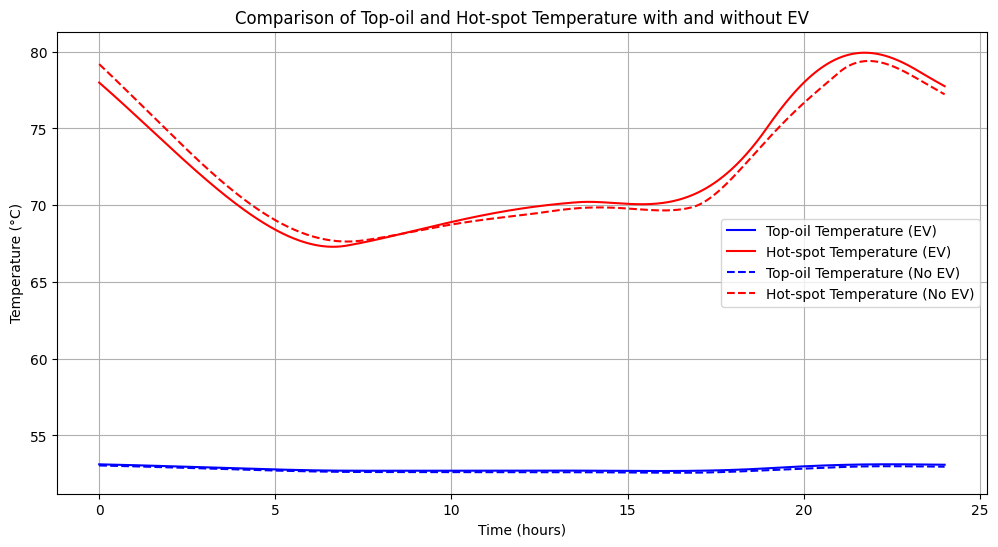

From the hot spot the lifespan of the transformer is then calculated uing the following reference:

**Transformer Thermal Model**

In this paper, the transformer is modeled using a thermal model, which is described in this section. The solid insulation is considered a vulnerable part of the transformer. Maintenance activities aimed at improving the condition of the solid insulation only temporarily reduce its rate of deterioration and do not improve its condition. As a result, the solid insulation undergoes continuous irreversible deterioration, commonly referred to as aging. The aging of the transformer is essentially the aging of the solid insulation, and this process depends on factors such as temperature, moisture content, oxygen content, and acid content.

Thermal models of the solid insulation use temperature as the controlling parameter. Temperature plays a critical role because chemical reactions, including the deterioration of solid insulation, accelerate at higher temperatures. The hottest part of the solid insulation, known as the "hotspot" (denoted as \( \theta_{h,t} \)), is the area that ages most rapidly. The parameters for the thermal model are listed below:

- **Hot-spot temperature (°C):** \( \theta_{h,t} \)
- **Top-oil temperature in the tank (°C):** \( \theta_{o,t} \)
- **Hot-spot-to-oil gradient in the tank (K):** \( \Delta \theta_h \)
- **Load factor:** \( K \)
- **Ambient temperature (°C):** \( \theta_{a,t} \)
- **Top-oil temperature rise in steady state at rated losses (K):** \( \Delta \theta_{or} \)
- **Hot-spot-to-top-oil gradient at rated current (K):** \( \Delta \theta_{hr} \)
- **Load loss ratio at rated current to no-load losses:** \( R \)
- **Average winding time constant:** \( \tau_w \)
- **Average oil time constant:** \( \tau_o \)
- **Exponential power of total losses vs. top-oil temperature rise:** \( x \)
- **Exponential power of current vs. winding temperature rise:** \( y \)
- **Thermal model constants:** \( k_{11}, k_{21}, k_{22} \)

The temperature of the hotspot \( \theta_{h,t} \) is used to determine the relative aging rate. For non-thermally upgraded paper, the aging rate is calculated using the equation:
\[
V_t = 2^{(\theta_{h,t} - 98)/6}
\]
For thermally upgraded paper, the equation is:
\[
V_t = e^{(15000 / (110 + 273) - 15000 / (\theta_{h,t} + 273))}
\]
The relative aging rate is then used to determine the loss of life \( L \) over a period of time \( t \) using the equation:
\[
L_t = \int_0^t V_t \, dt
\]

The condition of the solid insulation is often measured by the tensile strength of the paper. Normal insulation life at different tensile strengths is outlined below:

- **50% retained tensile strength:** 65,000 hours
- **25% retained tensile strength:** 135,000 hours
- **200 retained degree of polymerization:** 150,000 hours

Since direct measurement of the tensile strength is difficult, these values serve as reference guidelines for assessing the condition of the solid insulation.

The loading on the transformer is used to calculate the hotspot temperature. The hotspot temperature is the sum of the ambient temperature, the top-oil temperature rise, and the temperature difference between the hotspot and the top-oil in the tank. A thermal model that describes the time-dependence of the hotspot temperature based on loading conditions is used in this paper. The differential equation for the top-oil temperature is:
\[
\left(1 + K^2 \frac{R}{1 + R}\right)^x \times \Delta \theta_{or} = k_{11} \times \tau_o \times \frac{d\theta_{o,t}}{dt} + (\theta_{o,t} - \theta_{a,t})
\]

The load factor \( K \) is calculated using the total load profile divided by the transformer’s rated size:
\[
K = \frac{P_{tot}}{T_{size}}
\]

The ambient temperature is assumed to remain constant. The differential equation for the hotspot temperature rise is:
\[
\Delta \theta_{h,t} = \Delta \theta_{h1,t} - \Delta \theta_{h2,t}
\]
where:
\[
k_{21} \times K^y \times \Delta \theta_{hr} = k_{22} \times \tau_w \times \frac{d\Delta \theta_{h1,t}}{dt} + \Delta \theta_{h1,t}
\]
and:
\[
(k_{21} - 1) \times K^y \times \Delta \theta_{hr} = \tau_o k_{22} \times \frac{d\Delta \theta_{h2,t}}{dt} + \Delta \theta_{h2,t}
\]

Finally, the equation for the hotspot temperature is:
\[
\theta_{h,t} = \theta_{o,t} + \Delta \theta_{h,t}
\]


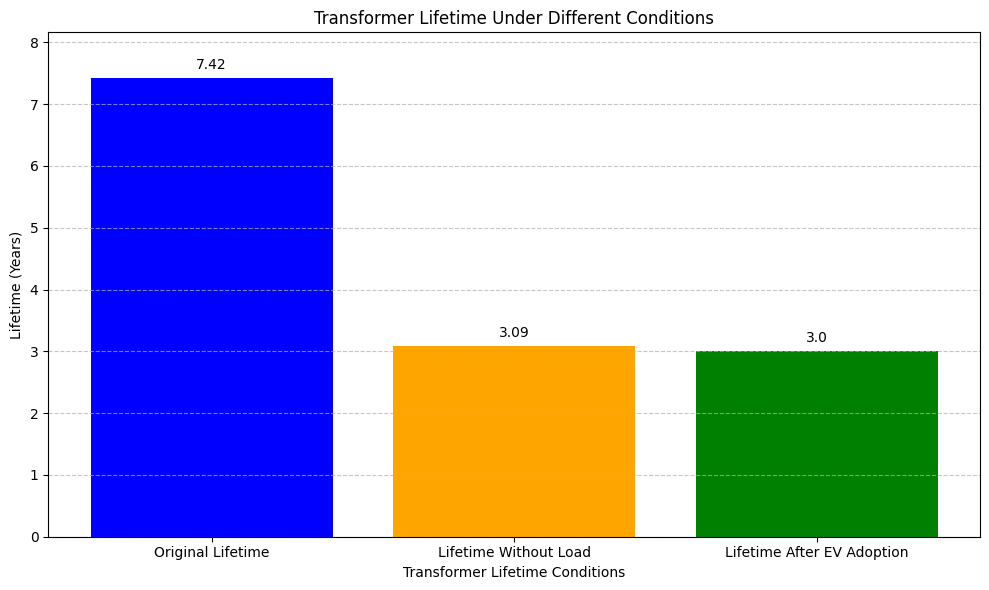

Original Transformer Lifetime (without load): 7.42 years
Transformer Lifetime (after load without EVs): 3.09 years
Transformer Lifetime (after EV adoption): 3.00 years
The original transformer lifetime without any load is approximately 7.42 years.
After accounting for the load without electric vehicles, the transformer lifetime decreases to 3.09 years due to the additional stress from the load.
With the adoption of electric vehicles, the lifetime further decreases to approximately 3.00 years, highlighting the significant impact of EVs on transformer lifespan.


In [26]:
# Calculate Vt and Vt_no_EV
Vt = 2 ** ((theta_h_sol - 98) / 6)
Vt_no_EV = 2 ** ((theta_h_sol_no_EV - 98) / 6)

# Calculate the loss of life Lt over the 24-hour period using trapezoidal integration
Lt = np.trapz(Vt, t_eval)
Lt_no_EV = np.trapz(Vt_no_EV, t_eval)

# Calculate transformer lifetimes
transformer_orgianl_life = (transformer_lifetime_hours / 24) / 365
transformer_lifetime_afterEVC_years = ((transformer_lifetime_hours / (1 + Lt)) / 24) / 365
transformer_lifetime_years = ((transformer_lifetime_hours / (1 + Lt_no_EV)) / 24) / 365

# Prepare data for bar chart
labels = ['Original Lifetime', 'Lifetime Without Load', 'Lifetime After EV Adoption']
values = [transformer_orgianl_life, transformer_lifetime_years, transformer_lifetime_afterEVC_years]

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.bar(labels, values, color=['blue', 'orange', 'green'])
plt.xlabel('Transformer Lifetime Conditions')
plt.ylabel('Lifetime (Years)')
plt.title('Transformer Lifetime Under Different Conditions')
plt.ylim(0, max(values) * 1.1)  # Set y-limit to a bit higher than the max value for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Adding numerical values on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, round(yval, 2), ha='center', va='bottom')

# Show the plot
plt.show()

# Explanation of the results
print(f"Original Transformer Lifetime (without load): {transformer_orgianl_life:.2f} years")
print(f"Transformer Lifetime (after load without EVs): {transformer_lifetime_years:.2f} years")
print(f"Transformer Lifetime (after EV adoption): {transformer_lifetime_afterEVC_years:.2f} years")

explanation = (
    f"The original transformer lifetime without any load is approximately {transformer_orgianl_life:.2f} years.\n"
    f"After accounting for the load without electric vehicles, the transformer lifetime decreases to "
    f"{transformer_lifetime_years:.2f} years due to the additional stress from the load.\n"
    f"With the adoption of electric vehicles, the lifetime further decreases to approximately "
    f"{transformer_lifetime_afterEVC_years:.2f} years, highlighting the significant impact of EVs on transformer lifespan."
)

print(explanation)


Original Transformer Lifetime (without load): 7.42 years
Transformer Lifetime (after load without EVs): 3.17 years
Transformer Lifetime (after EV adoption): 3.13 years
The original transformer lifetime without any load is approximately 7.42 years.
After accounting for the load without electric vehicles, the transformer lifetime decreases to 3.17 years due to the additional stress from the load.
With the adoption of electric vehicles, the lifetime further decreases to approximately 3.13 years, highlighting the significant impact of EVs on transformer lifespan.

## Power Factor Analysis


      Average_ST  Average_PT
Hour                        
0      14.415445   12.123290
1      12.647226    9.878207
2      11.209985    8.154268
3      10.798301    7.543807
4      10.542697    7.275310
5      11.398727    8.412955
6      15.818581   12.859655
7      18.540662   16.645364
8      20.012404   17.872385
9      19.999391   18.134024
10     21.292149   19.234887
11     19.328007   17.646033
12     20.667843   18.618966
13     20.060712   18.354758
14     19.391988   17.326790
15     18.489080   16.772402
16     19.320679   17.272797
17     22.235072   20.190563
18     28.967732   26.713835
19     32.389730   31.008909
20     29.124204   27.887588
21     29.632016   28.255431
22     22.203102   20.578563
23     17.728630   15.660603
Hour
0     0.840993
1     0.781057
2     0.727411
3     0.698611
4     0.690081
5     0.738061
6     0.812946
7     0.897776
8     0.893065
9     0.906729
10    0.903379
11    0.912977
12    0.900866
13    0.914960
14    0.893503
15    0.907152
1

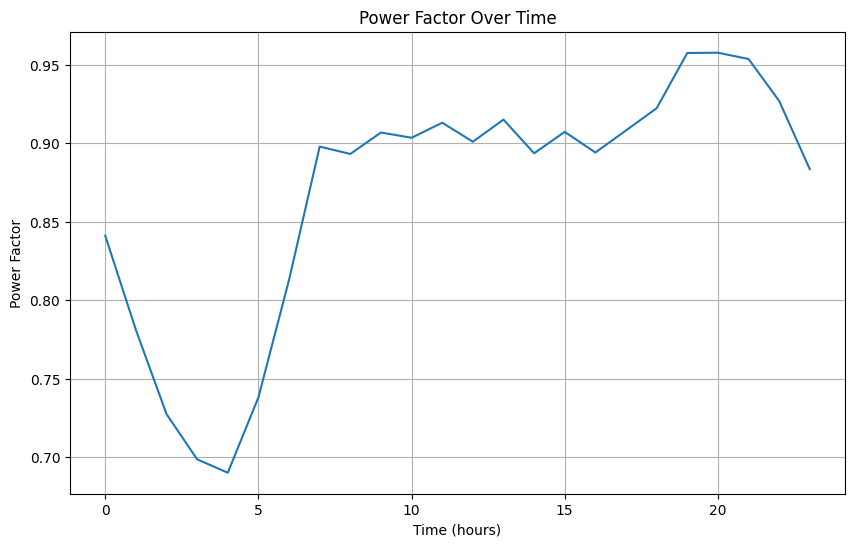

In [27]:
# create a dataframe with the total real and complex power
# Calculate the average ST across all normalized hostels
merged_df_normalized['Average_ST'] = (merged_df_normalized['File1', 'ST'] +
                                      merged_df_normalized['File2', 'ST'] +
                                      merged_df_normalized['File3', 'ST'] +
                                      merged_df_normalized['File4', 'ST']) / 4  # Taking the average of ST
average_single_hostel_profile_ST = reverse_z_score_normalize(merged_df_normalized['Average_ST'], df2['ST'])
# Calculate the average PT across all normalized hostels
merged_df_normalized['Average_PT'] = (merged_df_normalized['File1', 'PT'] +
                                      merged_df_normalized['File2', 'PT'] +
                                      merged_df_normalized['File3', 'PT'] +
                                      merged_df_normalized['File4', 'PT']) / 4  # Taking the average of PT
average_single_hostel_profile_PT = reverse_z_score_normalize(merged_df_normalized['Average_PT'], df2['PT'])

#combining the two dataframe to create a new data frame combine_data
combine_data = pd.concat([average_single_hostel_profile_ST, average_single_hostel_profile_PT], axis=1)

print(combine_data)

#Calculating the power factor for each hour by dividing each average pt with the st and creating a new dataframe that has a PF column, powerfactor_total
powerfactor_total_no_ev = combine_data['Average_PT'] / combine_data['Average_ST']
print(powerfactor_total_no_ev)

#plotting power factor agianst time in hours from the powerfactor_total_no_ev dataframe
plt.figure(figsize=(10, 6))
plt.plot(powerfactor_total_no_ev)
plt.xlabel('Time (hours)')
plt.ylabel('Power Factor')
plt.title('Power Factor Over Time')
plt.grid(True)
plt.show()

#finding the mean average power factor and the standard deviation
mean_powerfactor_no_ev = powerfactor_total_no_ev.mean()
std_powerfactor_no_ev = powerfactor_total_no_ev.std()


## Voltage Deviation

In [28]:
pip install pandapower

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 60.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.7/82.7 kB 7.0 MB/s eta 0:00:00
  Created wheel for pandapower: filename=pandapower-2.14.11-py3-none-any.whl size=13131028 sha256=109d90a89b9e335a3a0b20760d51ce254f06ffdcf724c4fddca87a469ca0315d
  Stored in directory: /root/.cache/pip/wheels/7f/de/5a/7b00f385eb06d1fb1f7c1cd06f9bb901709c038d3899548cf1
Successfully built pandapower


## Power System Losses

In [29]:
import os
import numpy as np
import pandas as pd
import tempfile
import random
import pandapower as pp
from pandapower.timeseries import DFData
from pandapower.timeseries import OutputWriter
from pandapower.timeseries.run_time_series import run_timeseries
from pandapower.control import ConstControl

In [30]:
def create_output_writer(net, time_steps, output_dir):
    ow = OutputWriter(net, time_steps, output_path=output_dir, output_file_type=".xlsx", log_variables=list())
    # these variables are saved to the harddisk after / during the time series loop
    ow.log_variable('res_bus', 'vm_pu')
    ow.log_variable('res_line', 'loading_percent')
    ow.log_variable('res_line', 'i_ka')
    return ow

In [95]:
def create_controllers(net, ds):
    print("In the create controller")

    try:
        # print("Hostel profile:", ds.df["hostel_p"])
        ConstControl(net, element='load', variable='p_mw', element_index=[0],
                     data_source=ds, profile_name=["hostel_p"])
        print("Hostel Controller created successfully")
    except Exception as e:
        print("Error creating Hostel Controller:", e)

    try:
        # print("EV profile:", ds.df["ev_p"])
        ConstControl(net, element='load', variable='p_mw', element_index=[0],
                     data_source=ds, profile_name=["ev_p"])
        print("EV Controller created successfully")
    except Exception as e:
        print("Error creating EV Controller:", e)


In [32]:
print(thd_hostel_df.tail())

      minutes       THD
1436     1436  3.296606
1437     1437  3.296606
1438     1438  3.296606
1439     1439  3.296606
1440     1440  3.296606


In [102]:
def create_data_source():
    profiles = pd.DataFrame()

    profiles['ev_p'] = average_load_profile_ev_df['PT']/1000

    profiles['hostel_p'] = average_load_profile_h_df['PT']/1000
    # print(profiles)

    ds = DFData(profiles)
    # print(ds)
    return profiles, ds

In [83]:
def timeseries_example(output_dir):
    # 1. create test net
    net = simple_test_net()

    # 2. create (random) data source
    n_timesteps = 1440
    profiles, ds = create_data_source()
    # 3. create controllers (to control P values of the load and the sgen)
    create_controllers(net, ds)

    # time steps to be calculated. Could also be a list with non-consecutive time steps
    time_steps = range(0, n_timesteps)

    # 4. the output writer with the desired results to be stored to files.
    ow = create_output_writer(net, time_steps, output_dir=output_dir)

    # 5. the main time series function
    run_timeseries(net, time_steps)


In [116]:
def simple_test_net():
    """
    simple net that looks like:

    ext_grid b0---b1 trafo(11/.4)b2-------- b3----b4 hostel
                                            |
                                            |
                                            b5 ev
    """
    net = pp.create_empty_network()
    pp.set_user_pf_options(net, init_vm_pu = "flat", init_va_degree = "auto", calculate_voltage_angles=True)

    b0 = pp.create_bus(net, 11)
    b1 = pp.create_bus(net, 11)
    b2 = pp.create_bus(net, .4)
    b3 = pp.create_bus(net, .4)
    b4 = pp.create_bus(net, .4)
    b5 = pp.create_bus(net, .4)

    pp.create_ext_grid(net, b0, pu=1.0)
    # pp.create_gen(net, bus=b0, p_mw=25, vm_pu=1.0, slack=True, name="Slack Generator")
    pp.create_line(net, b0, b1, .6, "NAYY 4x50 SE")
    trafo_data = {
        "sn_mva": .5,          # Rated power in MVA
        "vn_hv_kv": 11,       # High voltage side (primary)
        "vn_lv_kv": .4,        # Low voltage side (secondary)
        "vk_percent": 6.0,      # Short-circuit voltage (in %)
        "vkr_percent": 0.78,    # Short-circuit losses (in %)
        "pfe_kw": 1.1,          # Iron losses in kW
        "i0_percent": 0.28,     # No-load current (in %)
        "shift_degree": 0,      # Phase-shift (in degrees)
    }


    # pp.create_transformer(net, b1, b2, "25 MVA 110/20 kV", name='tr1')

    # Create custom transformer type and add transformer
    pp.create_std_type(net, trafo_data, name="500kVA 11/0.4 kV", element='trafo')
    pp.create_transformer(net, hv_bus=b1, lv_bus=b2, std_type="500kVA 11/0.4 kV", name="500kVA Transformer")
    pp.create_line(net, b2,b3,.1,"NAYY 4x50 SE")
    pp.create_line(net, b3, b4, .2, "NAYY 4x50 SE")
    pp.create_line(net, b3, b5, .12, "NAYY 4x50 SE")

    ev_p_kw_avg = np.mean(average_load_profile_ev_df['PT'])/1000
    hostel_p_kw_avg = np.mean(average_load_profile_h_df['PT'])/1000

    pp.create_load(net, b4, p_mw=ev_p_kw_avg, name='ev_p')
    pp.create_load(net, b3, p_mw=hostel_p_kw_avg, name='hostel_p')

    pp.runpp(net)

    # 1. Voltage Magnitude at each Bus
    bus_voltages = net.res_bus.vm_pu
    bus_names = ["b0 (ext_grid)", "b1", "b2", "b3","b4 (hostel)", "b5 (EV)"]

    plt.figure(figsize=(8, 5))
    plt.bar(bus_names, bus_voltages)
    plt.xlabel('Bus')
    plt.ylabel('Voltage Magnitude [pu]')
    plt.title('Voltage Magnitude at Each Bus')
    plt.ylim(0.9, 1.1)  # Assuming voltage is close to 1.0 pu
    plt.grid(True)
    plt.show()

    # 2. Line Current Magnitudes
    line_currents = net.res_line.loading_percent
    line_labels = ['b0-b1', 'b2-b3', 'b3-b4', 'b3-b5']

    plt.figure(figsize=(8, 5))
    plt.bar(line_labels, line_currents)
    plt.xlabel('Line')
    plt.ylabel('Line Loading [%]')
    plt.title('Line Loading (Current) in Percent')
    plt.grid(True)
    plt.show()

    # 3. Real Power Flow at each Bus
    bus_real_power = net.res_bus.p_mw

    plt.figure(figsize=(8, 5))
    plt.bar(bus_names, bus_real_power)
    plt.xlabel('Bus')
    plt.ylabel('Real Power [MW]')
    plt.title('Real Power Flow at Each Bus')
    plt.grid(True)
    plt.show()

    # 4. Reactive Power Flow at each Bus
    bus_reactive_power = net.res_bus.q_mvar

    plt.figure(figsize=(8, 5))
    plt.bar(bus_names, bus_reactive_power)
    plt.xlabel('Bus')
    plt.ylabel('Reactive Power [MVAR]')
    plt.title('Reactive Power Flow at Each Bus')
    plt.grid(True)
    plt.show()

    return net

Results can be found in your local temp folder: /tmp/time_series_example


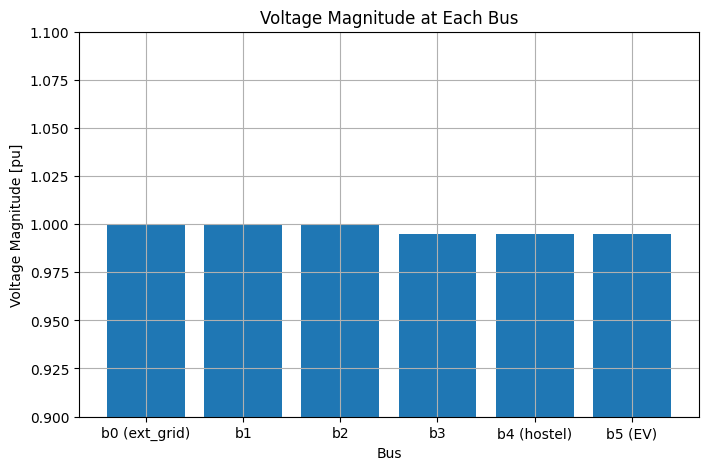

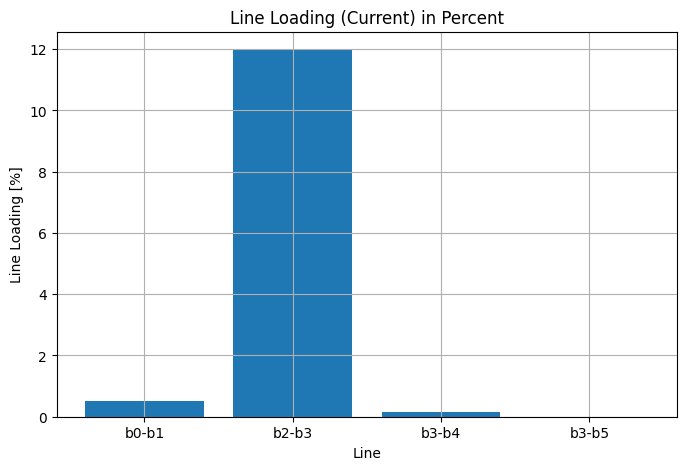

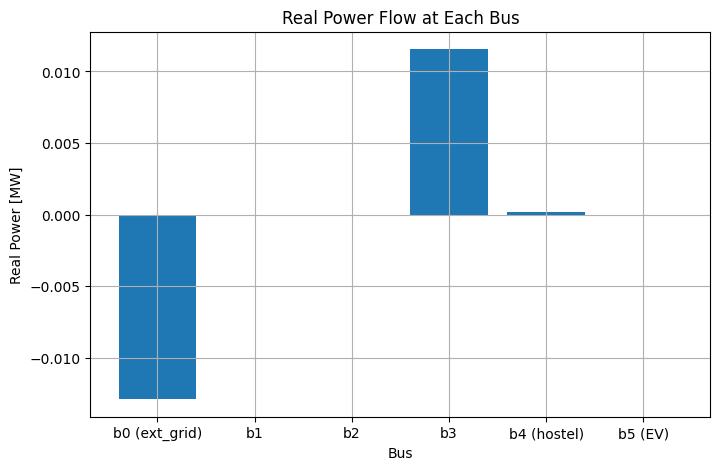

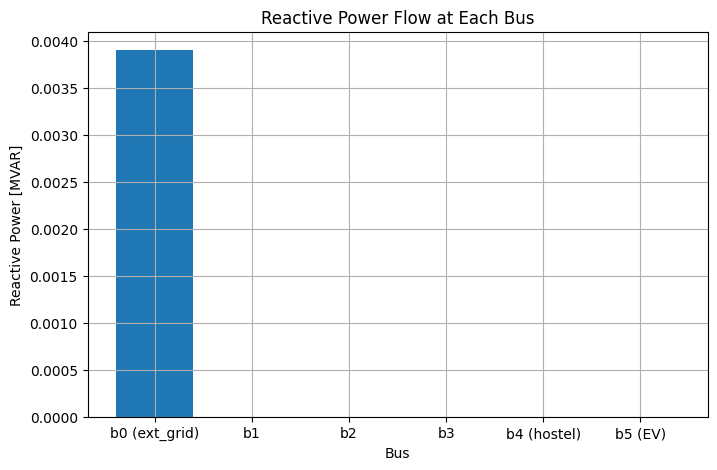

/usr/local/lib/python3.10/dist-packages/pandapower/timeseries/output_writer.py:177: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'range(0, 1440)' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  self.output["Parameters"].loc[:, "time_step"] = self.time_steps
/usr/local/lib/python3.10/dist-packages/pandapower/control/run_control.py:50: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  level = controller.level.fillna(0).apply(asarray).values


In the create controller
Hostel Controller created successfully
EV Controller created successfully


100%|██████████| 1440/1440 [00:15<00:00, 90.38it/s] 


In [117]:
output_dir = os.path.join(tempfile.gettempdir(), "time_series_example")
print("Results can be found in your local temp folder: {}".format(output_dir))
if not os.path.exists(output_dir):
    os.mkdir(output_dir)

timeseries_example(output_dir)

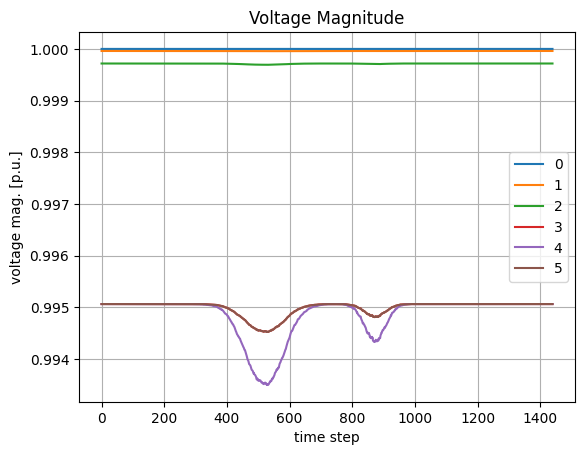

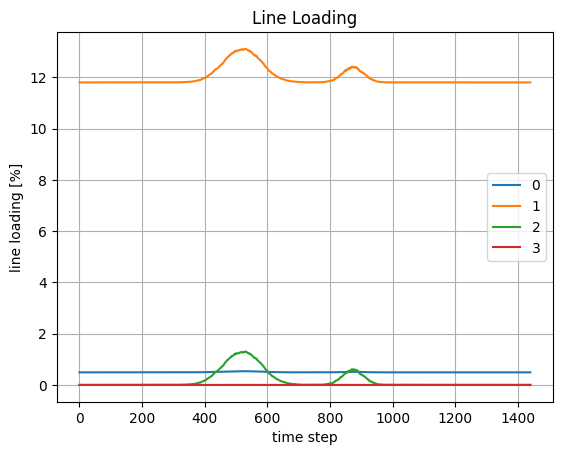

In [125]:
# voltage results
vm_pu_file = os.path.join(output_dir, "res_bus", "vm_pu.xlsx")
vm_pu = pd.read_excel(vm_pu_file, index_col=0)
vm_pu.plot(label="vm_pu")
plt.xlabel("time step")
plt.ylabel("voltage mag. [p.u.]")
plt.title("Voltage Magnitude")
plt.grid()
plt.show()

# line loading results
ll_file = os.path.join(output_dir, "res_line", "loading_percent.xlsx")
line_loading = pd.read_excel(ll_file, index_col=0)
line_loading.plot(label="line_loading")
plt.xlabel("time step")
plt.ylabel("line loading [%]")
plt.title("Line Loading")
plt.grid()
plt.show()